# MICRO CREDIT PROJECT

**Problem Statement**

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 
Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.
Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.

We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 

They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 

They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 




# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import flatten

#import warnings:
import warnings
warnings.filterwarnings('ignore')

# Loading dataset

In [2]:
#Reading the Dataset:
mcd = pd.read_csv(r'D:\flip WS\Micro-Credit-Project\Micro Credit Project\Data file.csv',parse_dates=['pdate'],index_col=None)
mcd

Unnamed: 0  label       msisdn     aon  daily_decr30  daily_decr90  \
0                1      0  21408I70789   272.0   3055.050000   3065.150000   
1                2      1  76462I70374   712.0  12122.000000  12124.750000   
2                3      1  17943I70372   535.0   1398.000000   1398.000000   
3                4      1  55773I70781   241.0     21.228000     21.228000   
4                5      1  03813I82730   947.0    150.619333    150.619333   
...            ...    ...          ...     ...           ...           ...   
209588      209589      1  22758I85348   404.0    151.872333    151.872333   
209589      209590      1  95583I84455  1075.0     36.936000     36.936000   
209590      209591      1  28556I85350  1013.0  11843.111667  11904.350000   
209591      209592      1  59712I82733  1732.0  12488.228333  12574.370000   
209592      209593      1  65061I85339  1581.0   4489.362000   4534.820000   

        rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0         220.13    260.13                2.0                0.0  ...   
1        3691.26   3691.26               20.0                0.0  ...   
2         900.13    900.13                3.0                0.0  ...   
3         159.42    159.42               41.0                0.0  ...   
4        1098.90   1098.90                4.0                0.0  ...   
...          ...       ...                ...                ...  ...   
209588   1089.19   1089.19                1.0                0.0  ...   
209589   1728.36   1728.36                4.0                0.0  ...   
209590   5861.83   8893.20                3.0                0.0  ...   
209591    411.83    984.58                2.0               38.0  ...   
209592    483.92    631.20               13.0                0.0  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0                   6.0                 0.0          2.0            12   
1                  12.0                 0.0          1.0            12   
2                   6.0                 0.0          1.0             6   
3                   6.0                 0.0          2.0            12   
4                   6.0                 0.0          7.0            42   
...                 ...                 ...          ...           ...   
209588              6.0                 0.0          2.0            12   
209589              6.0                 0.0          3.0            18   
209590             12.0                 0.0          6.0            54   
209591             12.0                 0.0          3.0            24   
209592             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                     6                 0.0  29.000000  29.000000      UPW   
1                    12                 0.0   0.000000   0.000000      UPW   
2                     6                 0.0   0.000000   0.000000      UPW   
3                     6                 0.0   0.000000   0.000000      UPW   
4                     6                 0.0   2.333333   2.333333      UPW   
...                 ...                 ...        ...        ...      ...   
209588                6                 0.0   1.000000   1.000000      UPW   
209589                6                 0.0   1.000000   1.000000      UPW   
209590               12                 0.0   4.000000   3.833333      UPW   
209591               12                 0.0   0.000000  10.500000      UPW   
209592               12                 0.0   0.000000   0.000000      UPW   

            pdate  
0      2016-07-20  
1      2016-08-10  
2      2016-08-19  
3      2016-06-06  
4      2016-06-22  
...           ...  
209588 2016-06-17  
209589 2016-06-12  
209590 2016-07-29  
209591 2016-07-25  
209592 2016-07-07  

[209593 rows x 37 columns]

In [3]:
# checking the features, their shape, duplicate values and nan values in the Datasets

print("\nFeatures Present in the Dataset: \n", mcd.columns)
shape=mcd.shape
print("\nTotal Number of Rows : ",shape[0])
print("Total Number of Features : ", shape[1])
print("\n\nData Types of Features :\n", mcd.dtypes)
print("\nDataset contains any NaN/Empty cells : ", mcd.isnull().values.any())
print("\nTotal number of empty rows in each feature:\n", mcd.isnull().sum(),"\n\n")
print("Total number of unique values in each feature:")
for col in mcd.columns.values:
    print("Number of unique values of {} : {}".format(col, mcd[col].nunique()))
    
print ('\nCreditor and defaulter counts','\n',mcd.label.value_counts())


Features Present in the Dataset: 
 Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

Total Number of Rows :  209593
Total Number of Features :  37


Data Types of Features :
 Unnamed: 0                       int64
label                            int64
msisdn                          object
aon                            float64
daily_

In [4]:
# Checking Statistical Information
mcd.describe()

Unnamed: 0          label            aon   daily_decr30  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean   104797.000000       0.875177    8112.343445    5381.402289   
std     60504.431823       0.330519   75696.082531    9220.623400   
min         1.000000       0.000000     -48.000000     -93.012667   
25%     52399.000000       1.000000     246.000000      42.440000   
50%    104797.000000       1.000000     527.000000    1469.175667   
75%    157195.000000       1.000000     982.000000    7244.000000   
max    209593.000000       1.000000  999860.755168  265926.000000   

        daily_decr90       rental30       rental90  last_rech_date_ma  \
count  209593.000000  209593.000000  209593.000000      209593.000000   
mean     6082.515068    2692.581910    3483.406534        3755.847800   
std     10918.812767    4308.586781    5770.461279       53905.892230   
min       -93.012667  -23737.140000  -24720.580000         -29.000000   
25%        42.692000     280.420000     300.260000           1.000000   
50%      1500.000000    1083.570000    1334.000000           3.000000   
75%      7802.790000    3356.940000    4201.790000           7.000000   
max    320630.000000  198926.110000  200148.110000      998650.377733   

       last_rech_date_da  last_rech_amt_ma  ...    cnt_loans30   amnt_loans30  \
count      209593.000000     209593.000000  ...  209593.000000  209593.000000   
mean         3712.202921       2064.452797  ...       2.758981      17.952021   
std         53374.833430       2370.786034  ...       2.554502      17.379741   
min           -29.000000          0.000000  ...       0.000000       0.000000   
25%             0.000000        770.000000  ...       1.000000       6.000000   
50%             0.000000       1539.000000  ...       2.000000      12.000000   
75%             0.000000       2309.000000  ...       4.000000      24.000000   
max        999171.809410      55000.000000  ...      50.000000     306.000000   

       maxamnt_loans30  medianamnt_loans30    cnt_loans90   amnt_loans90  \
count    209593.000000       209593.000000  209593.000000  209593.000000   
mean        274.658747            0.054029      18.520919      23.645398   
std        4245.264648            0.218039     224.797423      26.469861   
min           0.000000            0.000000       0.000000       0.000000   
25%           6.000000            0.000000       1.000000       6.000000   
50%           6.000000            0.000000       2.000000      12.000000   
75%           6.000000            0.000000       5.000000      30.000000   
max       99864.560864            3.000000    4997.517944     438.000000   

       maxamnt_loans90  medianamnt_loans90      payback30      payback90  
count    209593.000000       209593.000000  209593.000000  209593.000000  
mean          6.703134            0.046077       3.398826       4.321485  
std           2.103864            0.200692       8.813729      10.308108  
min           0.000000            0.000000       0.000000       0.000000  
25%           6.000000            0.000000       0.000000       0.000000  
50%           6.000000            0.000000       0.000000       1.666667  
75%           6.000000            0.000000       3.750000       4.500000  
max          12.000000            3.000000     171.500000     171.500000  

[8 rows x 34 columns]

    Some features even have negative values like the age on cellular network, main account last recharge date, data account last recharge date. Negative values in these features make no sense thus these values should be removed(Shown in EDA section).

In [5]:
# Dropping those features which are not adding any important information...
mcd.drop(['Unnamed: 0','pcircle','msisdn'],axis=1,inplace=True)
mcd

label     aon  daily_decr30  daily_decr90  rental30  rental90  \
0           0   272.0   3055.050000   3065.150000    220.13    260.13   
1           1   712.0  12122.000000  12124.750000   3691.26   3691.26   
2           1   535.0   1398.000000   1398.000000    900.13    900.13   
3           1   241.0     21.228000     21.228000    159.42    159.42   
4           1   947.0    150.619333    150.619333   1098.90   1098.90   
...       ...     ...           ...           ...       ...       ...   
209588      1   404.0    151.872333    151.872333   1089.19   1089.19   
209589      1  1075.0     36.936000     36.936000   1728.36   1728.36   
209590      1  1013.0  11843.111667  11904.350000   5861.83   8893.20   
209591      1  1732.0  12488.228333  12574.370000    411.83    984.58   
209592      1  1581.0   4489.362000   4534.820000    483.92    631.20   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                     2.0                0.0              1539              2   
1                    20.0                0.0              5787              1   
2                     3.0                0.0              1539              1   
3                    41.0                0.0               947              0   
4                     4.0                0.0              2309              7   
...                   ...                ...               ...            ...   
209588                1.0                0.0              4048              3   
209589                4.0                0.0               773              4   
209590                3.0                0.0              1539              5   
209591                2.0               38.0               773              5   
209592               13.0                0.0              7526              2   

        ...  amnt_loans30  maxamnt_loans30  medianamnt_loans30  cnt_loans90  \
0       ...            12              6.0                 0.0          2.0   
1       ...            12             12.0                 0.0          1.0   
2       ...             6              6.0                 0.0          1.0   
3       ...            12              6.0                 0.0          2.0   
4       ...            42              6.0                 0.0          7.0   
...     ...           ...              ...                 ...          ...   
209588  ...            12              6.0                 0.0          2.0   
209589  ...            18              6.0                 0.0          3.0   
209590  ...            42             12.0                 0.0          6.0   
209591  ...            18             12.0                 0.0          3.0   
209592  ...            18             12.0                 0.0          2.0   

        amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  \
0                 12                6                 0.0  29.000000   
1                 12               12                 0.0   0.000000   
2                  6                6                 0.0   0.000000   
3                 12                6                 0.0   0.000000   
4                 42                6                 0.0   2.333333   
...              ...              ...                 ...        ...   
209588            12                6                 0.0   1.000000   
209589            18                6                 0.0   1.000000   
209590            54               12                 0.0   4.000000   
209591            24               12                 0.0   0.000000   
209592            18               12                 0.0   0.000000   

        payback90      pdate  
0       29.000000 2016-07-20  
1        0.000000 2016-08-10  
2        0.000000 2016-08-19  
3        0.000000 2016-06-06  
4        2.333333 2016-06-22  
...           ...        ...  
209588   1.000000 2016-06-17  
209589   1.000000 2016-06-12  
209590   3.833333 2016-07-29  
209591  10.500000 2016-07-25  
209

# EDA (Exploratory data Analysis)

In [6]:
#Checking for negative values in the Dataset, as we can see that many of the features are having negative values...

(mcd.drop(['pdate'],axis=1) >= 0).all()

label                    True
aon                     False
daily_decr30            False
daily_decr90            False
rental30                False
rental90                False
last_rech_date_ma       False
last_rech_date_da       False
last_rech_amt_ma         True
cnt_ma_rech30            True
fr_ma_rech30             True
sumamnt_ma_rech30        True
medianamnt_ma_rech30     True
medianmarechprebal30    False
cnt_ma_rech90            True
fr_ma_rech90             True
sumamnt_ma_rech90        True
medianamnt_ma_rech90     True
medianmarechprebal90    False
cnt_da_rech30            True
fr_da_rech30             True
cnt_da_rech90            True
fr_da_rech90             True
cnt_loans30              True
amnt_loans30             True
maxamnt_loans30          True
medianamnt_loans30       True
cnt_loans90              True
amnt_loans90             True
maxamnt_loans90          True
medianamnt_loans90       True
payback30                True
payback90                True
dtype: boo

    Some of the features like "rental30" and "rental90" can have negative values as these feature will show the loan amount per user.

In [7]:
## Dropping few features...
mcd.drop(['rental30','rental90','pdate'],axis=1,inplace=True)

In [8]:
# This loop will drop all the negative values from those features in which they are not needed...
index=[]
for cols in mcd.columns.values:
    Index_1=mcd[mcd[f'{cols}'] < 0].index.values
    Index_2=Index_1.tolist()
    index.append(Index_2)
index_fl=flatten(index)
set(index_fl)
len(index_fl)

9922

In [9]:
# Dropping the negative values in the features where these negative values don't make any sense...
mcd.drop(index_fl,inplace=True)

In [10]:
#Checking if the negative value dropping process is succesful or not..
(mcd >= 0).all(0)

label                   True
aon                     True
daily_decr30            True
daily_decr90            True
last_rech_date_ma       True
last_rech_date_da       True
last_rech_amt_ma        True
cnt_ma_rech30           True
fr_ma_rech30            True
sumamnt_ma_rech30       True
medianamnt_ma_rech30    True
medianmarechprebal30    True
cnt_ma_rech90           True
fr_ma_rech90            True
sumamnt_ma_rech90       True
medianamnt_ma_rech90    True
medianmarechprebal90    True
cnt_da_rech30           True
fr_da_rech30            True
cnt_da_rech90           True
fr_da_rech90            True
cnt_loans30             True
amnt_loans30            True
maxamnt_loans30         True
medianamnt_loans30      True
cnt_loans90             True
amnt_loans90            True
maxamnt_loans90         True
medianamnt_loans90      True
payback30               True
payback90               True
dtype: bool

In [11]:
# Checking some rows where negative values were present, as we can see there are no negative values..
mcd[20:30]

label     aon  daily_decr30  daily_decr90  last_rech_date_ma  \
20      1   100.0    769.614000    777.460000                6.0   
21      0   378.0    514.693333    515.200000                2.0   
22      1   463.0   1540.000000   1541.000000                4.0   
23      1   857.0     58.023333     58.023333                2.0   
24      0   966.0    291.563333    291.563333                0.0   
25      1   656.0     63.250000     63.250000                1.0   
26      1  1179.0   3703.272000   3712.840000                2.0   
27      0   871.0    505.600000    508.000000               16.0   
28      1  1610.0   6688.559333   6705.260000                1.0   
29      1    67.0     16.166667     16.166667                3.0   

    last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  \
20                0.0               770              5          20.0   
21                0.0               773              1           0.0   
22                0.0               770              1           0.0   
23                0.0              1539              4          12.0   
24                0.0                 0              0           0.0   
25                0.0               770             15           1.0   
26                0.0               770              6           5.0   
27                0.0               770              1           0.0   
28                0.0              4048              9           1.0   
29                0.0              1539              2          12.0   

    sumamnt_ma_rech30  ...  cnt_loans30  amnt_loans30  maxamnt_loans30  \
20             8867.0  ...            1             6              6.0   
21              773.0  ...            2            12              6.0   
22              770.0  ...            1             6              6.0   
23             6164.0  ...            4            24              6.0   
24                0.0  ...            1             6              6.0   
25            12674.0  ...            5            30              6.0   
26             5395.0  ...            4            24              6.0   
27              770.0  ...            1             6              6.0   
28            32149.0  ...            8            48              6.0   
29             3086.0  ...            1             6              6.0   

    medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
20                 0.0          1.0             6                6   
21                 0.0          2.0            12                6   
22                 0.0          2.0            12                6   
23                 0.0          4.0            24                6   
24                 0.0          1.0             6                6   
25                 0.0          5.0            30                6   
26                 0.0          5.0            30                6   
27                 0.0          1.0             6                6   
28                 0.0          8.0            48                6   
29                 0.0          1.0             6                6   

    medianamnt_loans90  payback30  payback90  
20                 0.0      0.000   0.000000  
21                 0.0      0.000   0.000000  
22                 0.0      0.000  42.000000  
23                 0.0      6.000   6.000000  
24                 0.0      0.000   0.000000  
25                 0.0      1.800   1.800000  
26                 0.0      6.000   6.000000  
27                 0.0      0.000   0.000000  
28                 0.0      1.375   1.666667  
29                 0.0      0.000   0.000000  

[10 rows x 31 columns]

In [12]:
# reading dataset...
mcd_new=pd.read_csv(r'D:\flip WS\Micro-Credit-Project\Micro Credit Project\Data file.csv',parse_dates=['pdate'],index_col=None)

In [13]:
# Now placing the dropped "rental30" and "rental90" values in which the negative values are not outliers...
mcd['rental30']=mcd_new['rental30']
mcd['rental90']=mcd_new['rental90']
mcd['pdate']=mcd_new['pdate']

In [14]:
# Displaying few rows for checking whether the insertion is succesful or not..
mcd[20:30]

label     aon  daily_decr30  daily_decr90  last_rech_date_ma  \
20      1   100.0    769.614000    777.460000                6.0   
21      0   378.0    514.693333    515.200000                2.0   
22      1   463.0   1540.000000   1541.000000                4.0   
23      1   857.0     58.023333     58.023333                2.0   
24      0   966.0    291.563333    291.563333                0.0   
25      1   656.0     63.250000     63.250000                1.0   
26      1  1179.0   3703.272000   3712.840000                2.0   
27      0   871.0    505.600000    508.000000               16.0   
28      1  1610.0   6688.559333   6705.260000                1.0   
29      1    67.0     16.166667     16.166667                3.0   

    last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  \
20                0.0               770              5          20.0   
21                0.0               773              1           0.0   
22                0.0               770              1           0.0   
23                0.0              1539              4          12.0   
24                0.0                 0              0           0.0   
25                0.0               770             15           1.0   
26                0.0               770              6           5.0   
27                0.0               770              1           0.0   
28                0.0              4048              9           1.0   
29                0.0              1539              2          12.0   

    sumamnt_ma_rech30  ...  medianamnt_loans30  cnt_loans90  amnt_loans90  \
20             8867.0  ...                 0.0          1.0             6   
21              773.0  ...                 0.0          2.0            12   
22              770.0  ...                 0.0          2.0            12   
23             6164.0  ...                 0.0          4.0            24   
24                0.0  ...                 0.0          1.0             6   
25            12674.0  ...                 0.0          5.0            30   
26             5395.0  ...                 0.0          5.0            30   
27              770.0  ...                 0.0          1.0             6   
28            32149.0  ...                 0.0          8.0            48   
29             3086.0  ...                 0.0          1.0             6   

    maxamnt_loans90  medianamnt_loans90  payback30  payback90  rental30  \
20                6                 0.0      0.000   0.000000   1050.57   
21                6                 0.0      0.000   0.000000     56.26   
22                6                 0.0      0.000  42.000000    969.12   
23                6                 0.0      6.000   6.000000    479.44   
24                6                 0.0      0.000   0.000000  -2020.09   
25                6                 0.0      1.800   1.800000   2855.70   
26                6                 0.0      6.000   6.000000    340.96   
27                6                 0.0      0.000   0.000000   9276.68   
28                6                 0.0      1.375   1.666667   3553.83   
29                6                 0.0      0.000   0.000000    962.60   

    rental90      pdate  
20   1167.30 2016-07-03  
21     58.20 2016-07-01  
22    969.12 2016-08-08  
23    479.44 2016-06-26  
24  -2020.09 2016-06-23  
25   2855.70 2016-06-15  
26    376.42 2016-07-06  
27  10569.17 2016-07-09  
28   3653.05 2016-07-02  
29    962.60 2016-06-10  

[10 rows x 34 columns]

In [15]:
# Checking the correlation between the features and the label...
mcd.corr()

label       aon  daily_decr30  daily_decr90  \
label                 1.000000 -0.003257      0.161804      0.160075   
aon                  -0.003257  1.000000      0.000969      0.000218   
daily_decr30          0.161804  0.000969      1.000000      0.977540   
daily_decr90          0.160075  0.000218      0.977540      1.000000   
last_rech_date_ma     0.003291  0.001826     -0.000091      0.000346   
last_rech_date_da     0.000777 -0.001632     -0.002064     -0.002327   
last_rech_amt_ma      0.120954  0.003507      0.275021      0.263310   
cnt_ma_rech30         0.226554 -0.003179      0.446659      0.421963   
fr_ma_rech30          0.000269 -0.001087     -0.000877     -0.000623   
sumamnt_ma_rech30     0.193586  0.000421      0.634549      0.601720   
medianamnt_ma_rech30  0.130066  0.003524      0.295468      0.283012   
medianmarechprebal30 -0.003660  0.004244     -0.001180     -0.000728   
cnt_ma_rech90         0.226713 -0.002813      0.583609      0.589583   
fr_ma_rech90          0.073161  0.005023     -0.080244     -0.081445   
sumamnt_ma_rech90     0.197374  0.000776      0.761489      0.767461   
medianamnt_ma_rech90  0.109699  0.003917      0.257517      0.250213   
medianmarechprebal90  0.035454 -0.000904      0.037038      0.035904   
cnt_da_rech30         0.003886  0.001694      0.000451      0.000385   
fr_da_rech30         -0.000628  0.001094     -0.001628     -0.001658   
cnt_da_rech90         0.000457  0.001037      0.038082      0.030402   
fr_da_rech90         -0.006770  0.005448      0.020153      0.015914   
cnt_loans30           0.188395 -0.002216      0.360217      0.334496   
amnt_loans30          0.189479 -0.002162      0.466750      0.443116   
maxamnt_loans30       0.000591 -0.002675      0.000184      0.000193   
medianamnt_loans30    0.041934  0.005314     -0.012161     -0.006041   
cnt_loans90           0.005160 -0.000893      0.008838      0.009320   
amnt_loans90          0.192480 -0.002683      0.559284      0.563157   
maxamnt_loans90       0.080027 -0.001383      0.398443      0.395467   
medianamnt_loans90    0.033279  0.003436     -0.037608     -0.034942   
payback30             0.042385  0.002303      0.023488      0.016062   
payback90             0.042864  0.002546      0.043461      0.037270   
rental30              0.053048 -0.000946      0.441569      0.434178   
rental90              0.070185 -0.000880      0.457884      0.470832   

                      last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
label                          0.003291           0.000777          0.120954   
aon                            0.001826          -0.001632          0.003507   
daily_decr30                  -0.000091          -0.002064          0.275021   
daily_decr90                   0.000346          -0.002327          0.263310   
last_rech_date_ma              1.000000           0.001871         -0.000335   
last_rech_date_da              0.001871           1.000000          0.000086   
last_rech_amt_ma              -0.000335           0.000086          1.000000   
cnt_ma_rech30                  0.003927           0.001216         -0.009934   
fr_ma_rech30                  -0.001615           0.001232          0.002783   
sumamnt_ma_rech30              0.001663          -0.000206          0.437552   
medianamnt_ma_rech30          -0.001630           0.001266          0.792470   
medianmarechprebal30           0.004292           0.003041         -0.002577   
cnt_ma_rech90                  0.003790           0.000761          0.010124   
fr_ma_rech90                   0.000763           0.000996          0.104564   
sumamnt_ma_rech90              0.001790          -0.000776          0.416616   
medianamnt_ma_rech90          -0.000812           0.000423          0.816742   
medianmarechprebal90          -0.001030           0.004235          0.124778   
cnt_da_rech30                 -0.003495          -0.003657         -0.001666   
fr_da_rech30                  -0.003622           0.0000

# Univariant Plot Analysis

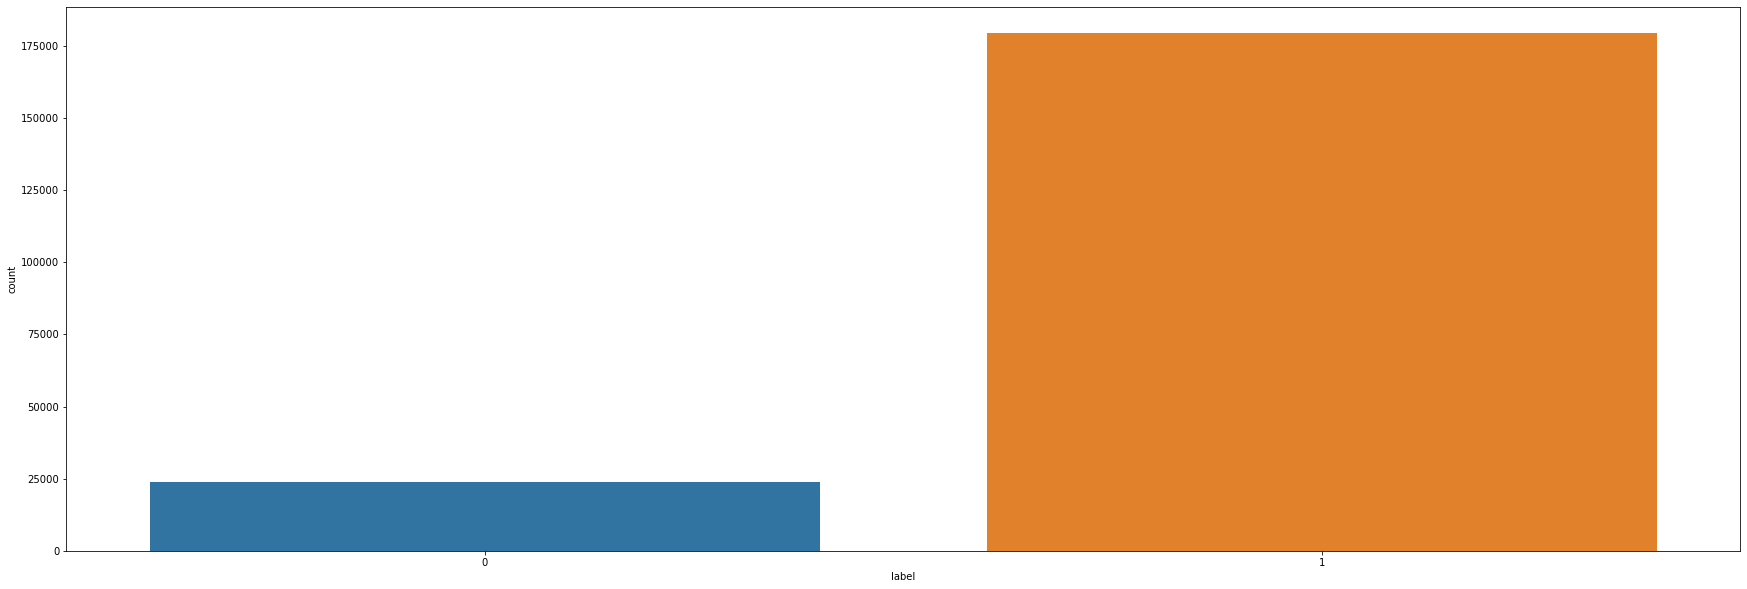

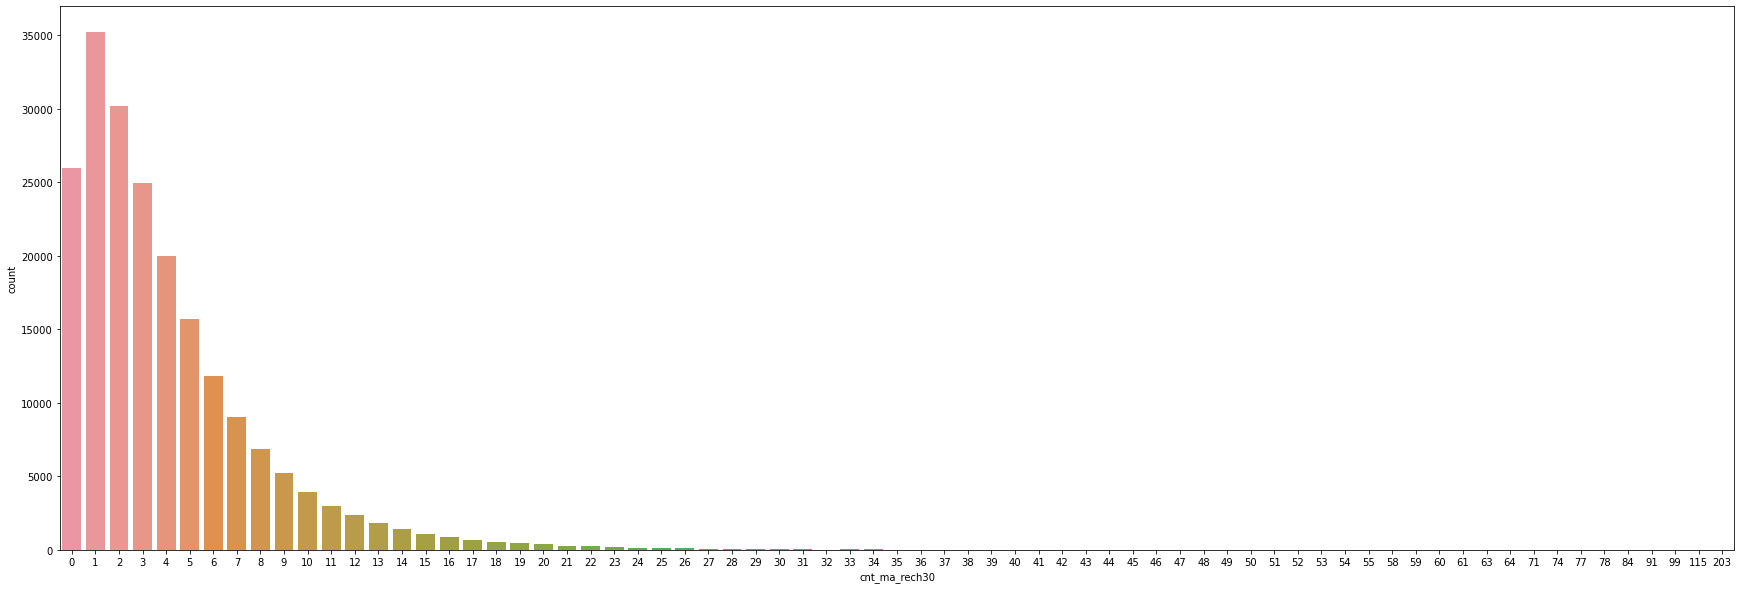

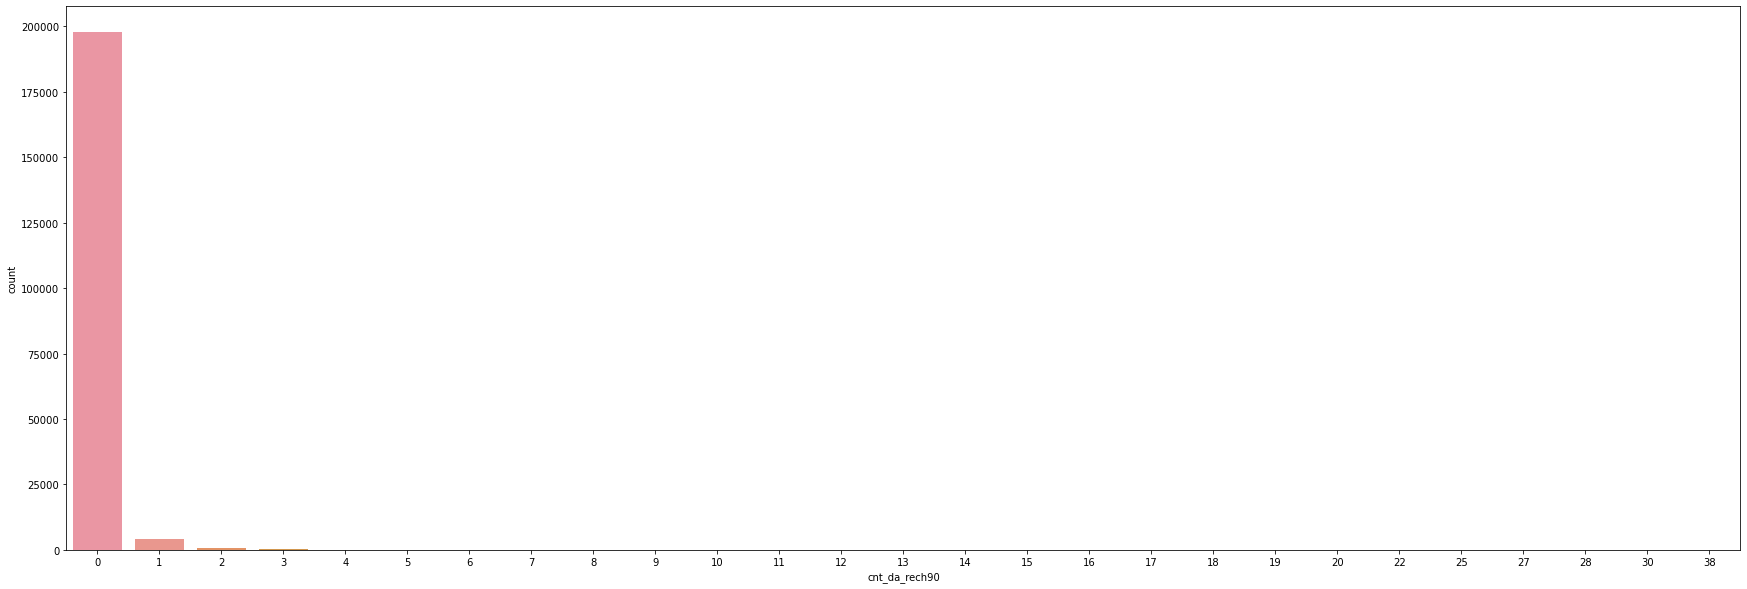

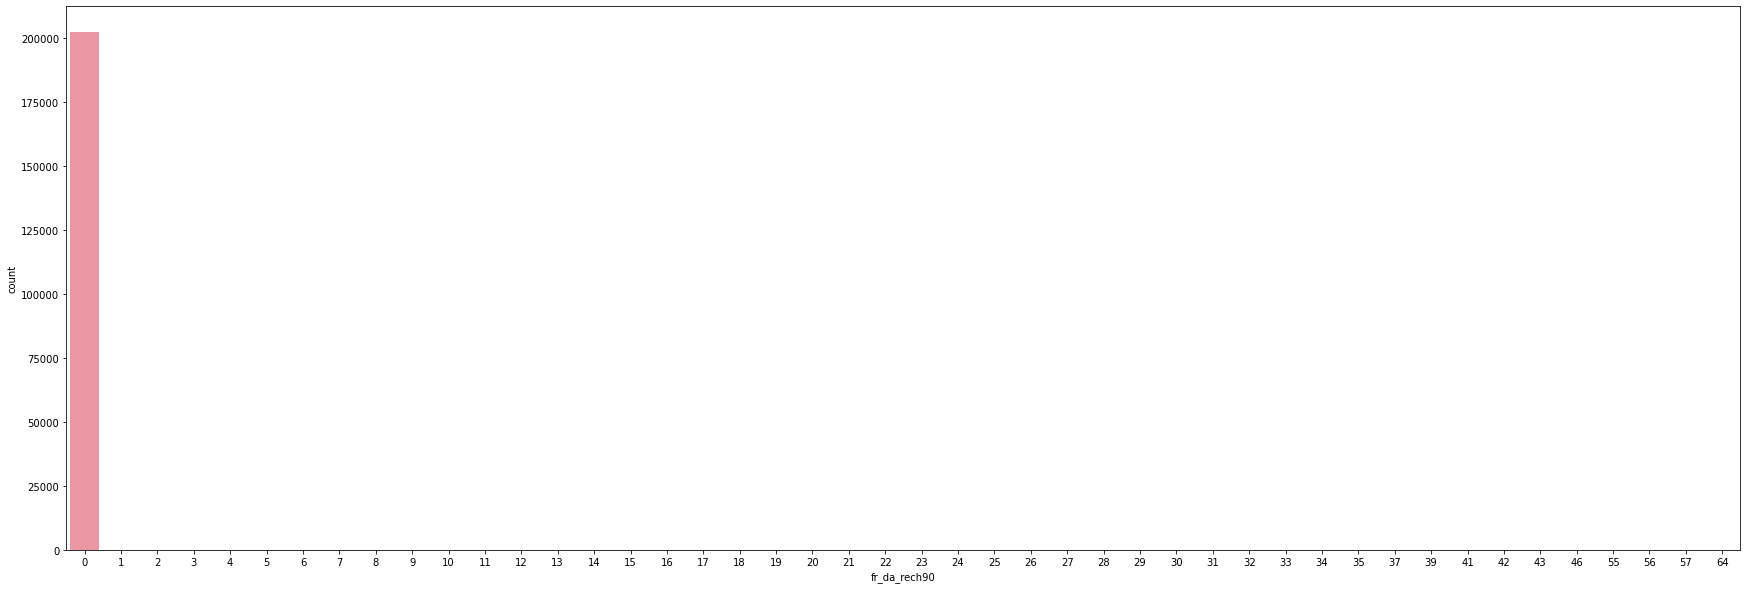

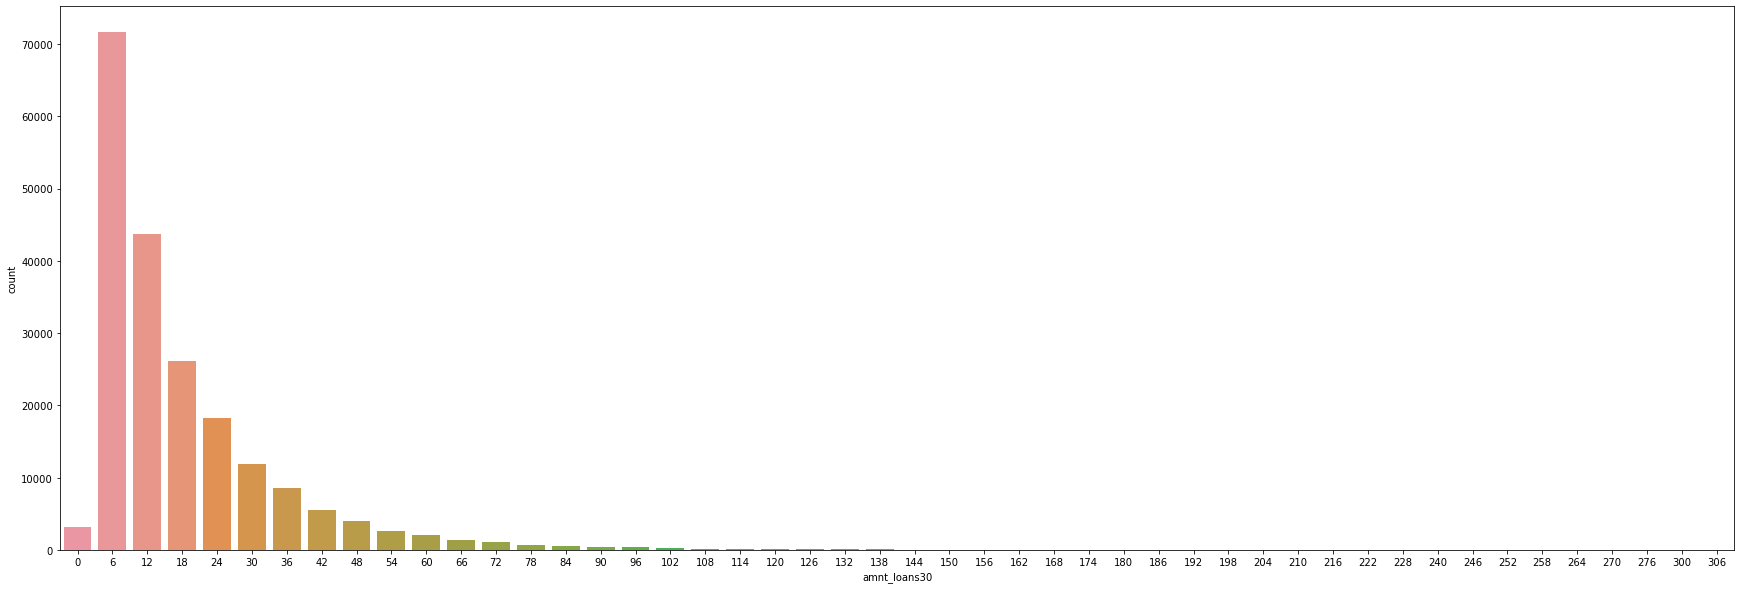

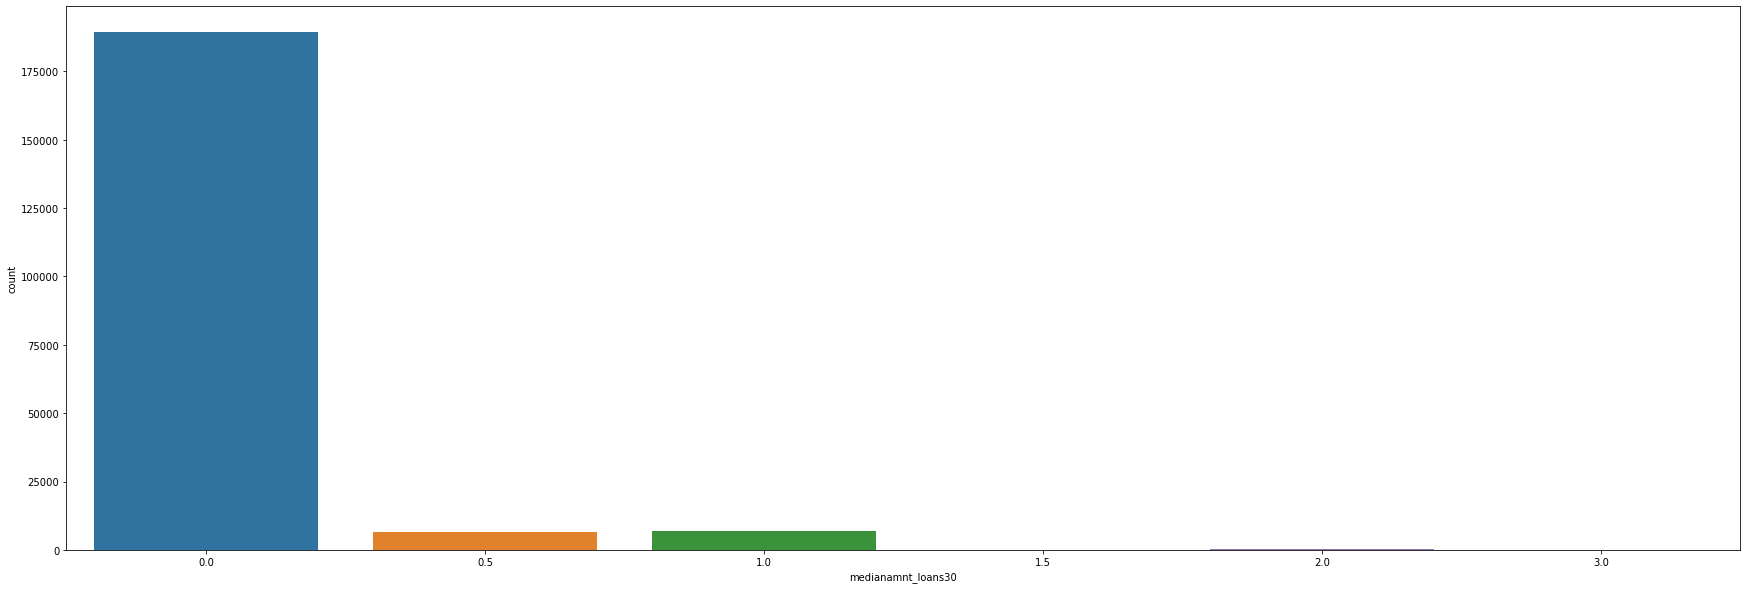

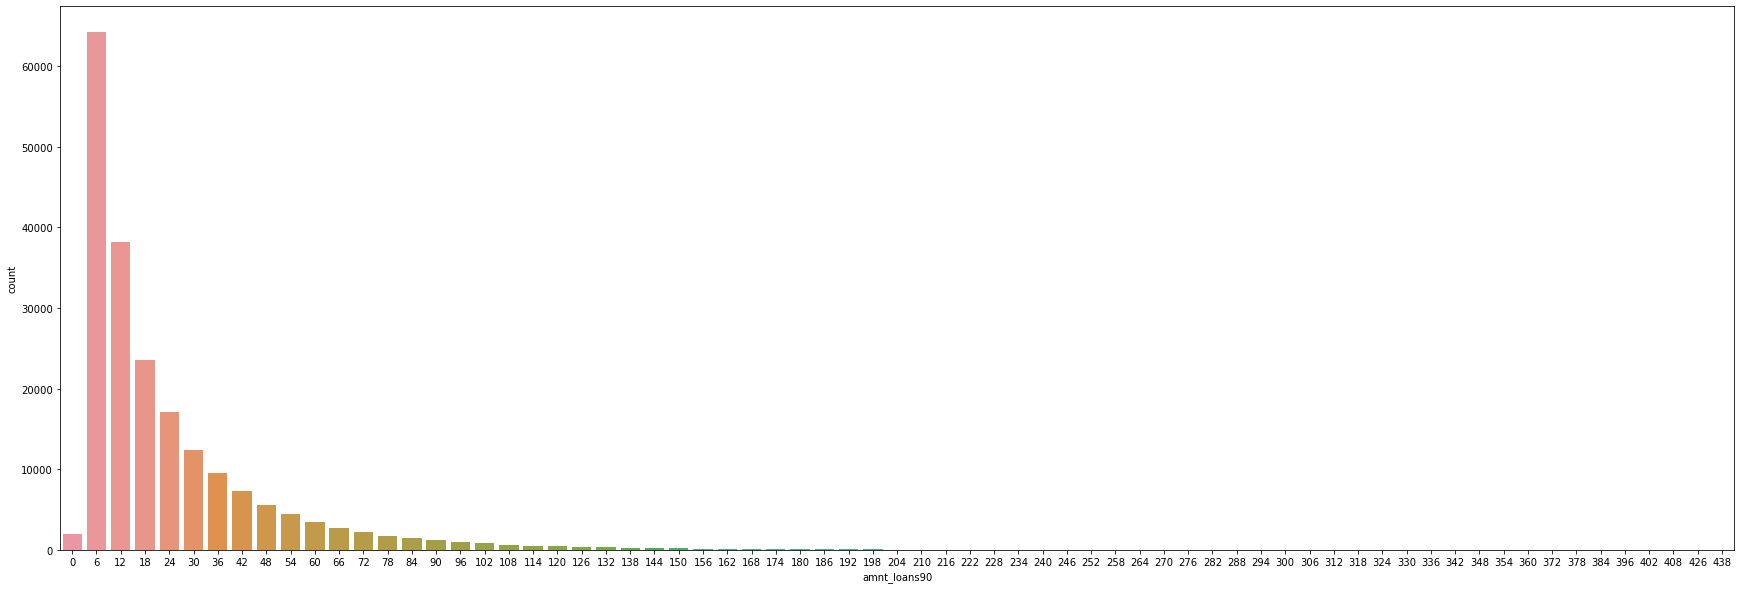

In [16]:
# For loop to display some important features counts in one go...
list=['label', 'last_rech_amt_ma', 'cnt_ma_rech30','cnt_ma_rech90', 'fr_ma_rech90',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30','amnt_loans30',
      'medianamnt_loans30', 'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', ]
for i in list:
    plt.subplots(figsize=(30,10))
    sns.countplot(i,data=mcd)
    plt.show()

label                      AxesSubplot(0.125,0.837584;0.133621x0.0424157)
aon                     AxesSubplot(0.285345,0.837584;0.133621x0.0424157)
daily_decr30             AxesSubplot(0.44569,0.837584;0.133621x0.0424157)
daily_decr90            AxesSubplot(0.606034,0.837584;0.133621x0.0424157)
last_rech_date_ma       AxesSubplot(0.766379,0.837584;0.133621x0.0424157)
last_rech_date_da          AxesSubplot(0.125,0.786685;0.133621x0.0424157)
last_rech_amt_ma        AxesSubplot(0.285345,0.786685;0.133621x0.0424157)
cnt_ma_rech30            AxesSubplot(0.44569,0.786685;0.133621x0.0424157)
fr_ma_rech30            AxesSubplot(0.606034,0.786685;0.133621x0.0424157)
sumamnt_ma_rech30       AxesSubplot(0.766379,0.786685;0.133621x0.0424157)
medianamnt_ma_rech30       AxesSubplot(0.125,0.735787;0.133621x0.0424157)
medianmarechprebal30    AxesSubplot(0.285345,0.735787;0.133621x0.0424157)
cnt_ma_rech90            AxesSubplot(0.44569,0.735787;0.133621x0.0424157)
fr_ma_rech90            AxesSubplot(0.

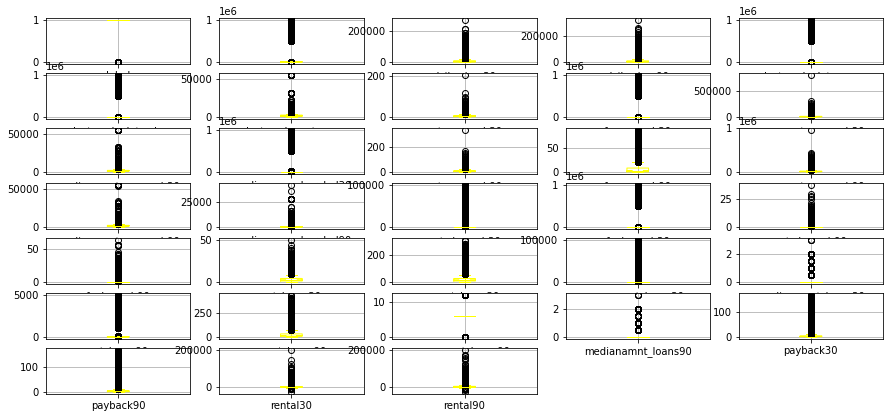

In [17]:
#Plotting the boxplot in order to check few statistical values and outliers
mcd.drop('pdate',axis=1).plot(kind='box', subplots=True, layout=(15,5),figsize=(15,15), grid=True, notch=True, color='yellow',legend=True)

As we can see that except the negative values there are still lot of outliers present.

array([[<AxesSubplot:title={'center':'label'}>,
        <AxesSubplot:title={'center':'aon'}>,
        <AxesSubplot:title={'center':'daily_decr30'}>,
        <AxesSubplot:title={'center':'daily_decr90'}>,
        <AxesSubplot:title={'center':'last_rech_date_ma'}>,
        <AxesSubplot:title={'center':'last_rech_date_da'}>],
       [<AxesSubplot:title={'center':'last_rech_amt_ma'}>,
        <AxesSubplot:title={'center':'cnt_ma_rech30'}>,
        <AxesSubplot:title={'center':'fr_ma_rech30'}>,
        <AxesSubplot:title={'center':'sumamnt_ma_rech30'}>,
        <AxesSubplot:title={'center':'medianamnt_ma_rech30'}>,
        <AxesSubplot:title={'center':'medianmarechprebal30'}>],
       [<AxesSubplot:title={'center':'cnt_ma_rech90'}>,
        <AxesSubplot:title={'center':'fr_ma_rech90'}>,
        <AxesSubplot:title={'center':'sumamnt_ma_rech90'}>,
        <AxesSubplot:title={'center':'medianamnt_ma_rech90'}>,
        <AxesSubplot:title={'center':'medianmarechprebal90'}>,
        <AxesSubplot:

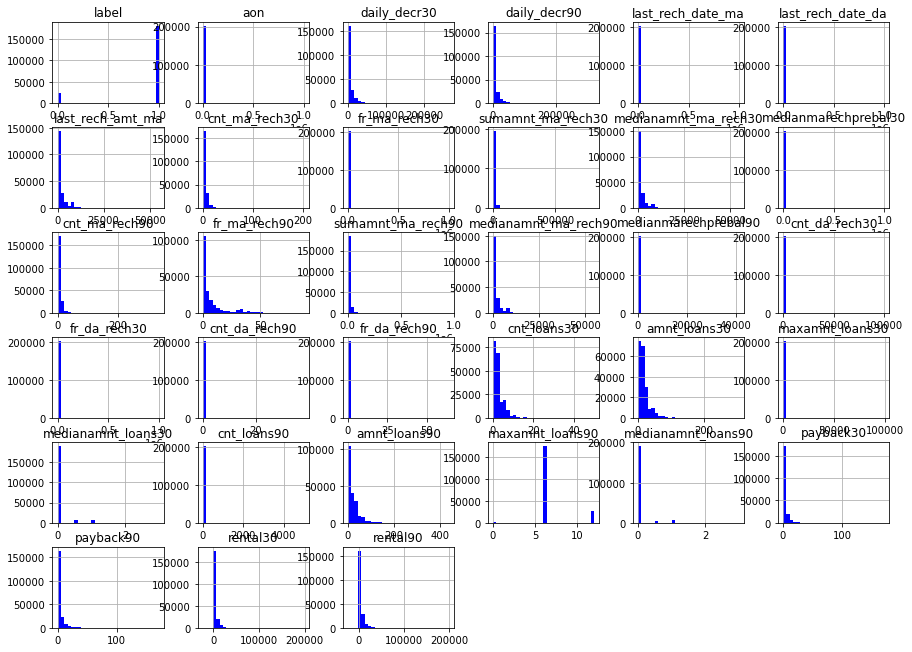

In [18]:
# Checking the Distribution using the histogram plot.
mcd.hist(figsize=(15,15),grid=True,layout=(8,6),bins=30,color='blue') 

    **From the above histogram plots, it is clear that the data is rightly skewed...

In [19]:
# Dropping the date feature to proceed further for outliers removing part...
mcd.drop('pdate',axis=1,inplace=True)

In [20]:
# Checking correlation among the features...
mcd.corr()

label       aon  daily_decr30  daily_decr90  \
label                 1.000000 -0.003257      0.161804      0.160075   
aon                  -0.003257  1.000000      0.000969      0.000218   
daily_decr30          0.161804  0.000969      1.000000      0.977540   
daily_decr90          0.160075  0.000218      0.977540      1.000000   
last_rech_date_ma     0.003291  0.001826     -0.000091      0.000346   
last_rech_date_da     0.000777 -0.001632     -0.002064     -0.002327   
last_rech_amt_ma      0.120954  0.003507      0.275021      0.263310   
cnt_ma_rech30         0.226554 -0.003179      0.446659      0.421963   
fr_ma_rech30          0.000269 -0.001087     -0.000877     -0.000623   
sumamnt_ma_rech30     0.193586  0.000421      0.634549      0.601720   
medianamnt_ma_rech30  0.130066  0.003524      0.295468      0.283012   
medianmarechprebal30 -0.003660  0.004244     -0.001180     -0.000728   
cnt_ma_rech90         0.226713 -0.002813      0.583609      0.589583   
fr_ma_rech90          0.073161  0.005023     -0.080244     -0.081445   
sumamnt_ma_rech90     0.197374  0.000776      0.761489      0.767461   
medianamnt_ma_rech90  0.109699  0.003917      0.257517      0.250213   
medianmarechprebal90  0.035454 -0.000904      0.037038      0.035904   
cnt_da_rech30         0.003886  0.001694      0.000451      0.000385   
fr_da_rech30         -0.000628  0.001094     -0.001628     -0.001658   
cnt_da_rech90         0.000457  0.001037      0.038082      0.030402   
fr_da_rech90         -0.006770  0.005448      0.020153      0.015914   
cnt_loans30           0.188395 -0.002216      0.360217      0.334496   
amnt_loans30          0.189479 -0.002162      0.466750      0.443116   
maxamnt_loans30       0.000591 -0.002675      0.000184      0.000193   
medianamnt_loans30    0.041934  0.005314     -0.012161     -0.006041   
cnt_loans90           0.005160 -0.000893      0.008838      0.009320   
amnt_loans90          0.192480 -0.002683      0.559284      0.563157   
maxamnt_loans90       0.080027 -0.001383      0.398443      0.395467   
medianamnt_loans90    0.033279  0.003436     -0.037608     -0.034942   
payback30             0.042385  0.002303      0.023488      0.016062   
payback90             0.042864  0.002546      0.043461      0.037270   
rental30              0.053048 -0.000946      0.441569      0.434178   
rental90              0.070185 -0.000880      0.457884      0.470832   

                      last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
label                          0.003291           0.000777          0.120954   
aon                            0.001826          -0.001632          0.003507   
daily_decr30                  -0.000091          -0.002064          0.275021   
daily_decr90                   0.000346          -0.002327          0.263310   
last_rech_date_ma              1.000000           0.001871         -0.000335   
last_rech_date_da              0.001871           1.000000          0.000086   
last_rech_amt_ma              -0.000335           0.000086          1.000000   
cnt_ma_rech30                  0.003927           0.001216         -0.009934   
fr_ma_rech30                  -0.001615           0.001232          0.002783   
sumamnt_ma_rech30              0.001663          -0.000206          0.437552   
medianamnt_ma_rech30          -0.001630           0.001266          0.792470   
medianmarechprebal30           0.004292           0.003041         -0.002577   
cnt_ma_rech90                  0.003790           0.000761          0.010124   
fr_ma_rech90                   0.000763           0.000996          0.104564   
sumamnt_ma_rech90              0.001790          -0.000776          0.416616   
medianamnt_ma_rech90          -0.000812           0.000423          0.816742   
medianmarechprebal90          -0.001030           0.004235          0.124778   
cnt_da_rech30                 -0.003495          -0.003657         -0.001666   
fr_da_rech30                  -0.003622           0.0000

The Dataset we are having, consists of some features giving information anout the user for the time span of 30 days and 90 days. According to me if we have data of large number of days for a particular user then we could interpret User's behavior more precisely because many users have the tendancy of repeating the same things. Thus the features having the data with a time span of 90 days gives more information about the user as compared to the features with a time span of 30 days.

From the above correlation table it is also clear that the features with time span of 30 and 90 days almost hav ethe same correlation thus we can drop one for the same information.

In [21]:
# Now dropping the features having same correlation...
mcd.drop(["daily_decr30","fr_ma_rech30","payback30","rental30","medianamnt_loans30","amnt_loans30",
                "fr_da_rech30","cnt_da_rech30","sumamnt_ma_rech30","fr_ma_rech30","cnt_ma_rech30"],axis=1,inplace=True)

In [22]:
# Checking the dataframe after dropping...
mcd

label     aon  daily_decr90  last_rech_date_ma  last_rech_date_da  \
0           0   272.0   3065.150000                2.0                0.0   
1           1   712.0  12124.750000               20.0                0.0   
2           1   535.0   1398.000000                3.0                0.0   
3           1   241.0     21.228000               41.0                0.0   
4           1   947.0    150.619333                4.0                0.0   
...       ...     ...           ...                ...                ...   
209588      1   404.0    151.872333                1.0                0.0   
209589      1  1075.0     36.936000                4.0                0.0   
209590      1  1013.0  11904.350000                3.0                0.0   
209591      1  1732.0  12574.370000                2.0               38.0   
209592      1  1581.0   4534.820000               13.0                0.0   

        last_rech_amt_ma  medianamnt_ma_rech30  medianmarechprebal30  \
0                   1539                1539.0                  7.50   
1                   5787                5787.0                 61.04   
2                   1539                1539.0                 66.32   
3                    947                   0.0                  0.00   
4                   2309                2309.0                 29.00   
...                  ...                   ...                   ...   
209588              4048                3178.0                 91.81   
209589               773                 773.0                161.30   
209590              1539                1539.0                 51.13   
209591               773                 773.0                164.00   
209592              7526                4532.5                356.70   

        cnt_ma_rech90  fr_ma_rech90  ...  cnt_da_rech90  fr_da_rech90  \
0                   2            21  ...              0             0   
1                   1             0  ...              0             0   
2                   1             0  ...              0             0   
3                   1             0  ...              0             0   
4                   8             2  ...              0             0   
...               ...           ...  ...            ...           ...   
209588              3             2  ...              0             0   
209589              6             2  ...              0             0   
209590             11             5  ...              0             0   
209591              6             4  ...              1             0   
209592              3            19  ...              0             0   

        cnt_loans30  maxamnt_loans30  cnt_loans90  amnt_loans90  \
0                 2              6.0          2.0            12   
1                 1             12.0          1.0            12   
2                 1              6.0          1.0             6   
3                 2              6.0          2.0            12   
4                 7              6.0          7.0            42   
...             ...              ...          ...           ...   
209588            2              6.0          2.0            12   
209589            3              6.0          3.0            18   
209590            4             12.0          6.0            54   
209591            2             12.0          3.0            24   
209592            2             12.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback90  rental90  
0                     6                 0.0  29.000000    260.13  
1                    12                 0.0   0.000000   3691.26  
2                     6                 0.0   0.000000    900.13  
3                     6                 0.0   0.000000    159.42  
4                     6                 0.0   2.333333   1098.90  
...                 ...                 ...        ...       ...  
209588                6                 0.0   1.000000   1089.19  


    Using MS EXCEL I have found the maximum values a feature can have, beyond these values the values are unimaginable.
    
    (for an example beyond the value [2500], the very next value in "aon" feature comes out to be around 2379 years, which means a user is using the telephone services from 359 BCE which is clearly not possible).

    #************** Threshold Values that some of the important feature can have according to the data provided ***********

    1) rental30 and rental90 can be negative 
     2) last_rech_date_ma                    ==> max 113
    3) last_rech_date_da                    ==> max 115
    4) aon                                  ==> less than 2500  
    5) fr_ma_rech30                         ==> less than 38
    6) maxamnt_loans30                      ==> less than 12
    7) cnt_loans90                          ==> less than 71

In [23]:
# Removing outliers from features...
mcd_clean = mcd[mcd['last_rech_date_ma'] < 250]  
mcd_clean = mcd_clean[mcd_clean['last_rech_date_da'] <= 115]
mcd_clean = mcd_clean[mcd_clean['aon'] < 2500]
mcd_clean = mcd_clean[mcd_clean['cnt_loans90'] <= 71]
mcd_clean = mcd_clean[mcd_clean['maxamnt_loans30'] <= 12]

In [24]:
# Checking the clean dataset...
mcd_clean

label     aon  daily_decr90  last_rech_date_ma  last_rech_date_da  \
0           0   272.0   3065.150000                2.0                0.0   
1           1   712.0  12124.750000               20.0                0.0   
2           1   535.0   1398.000000                3.0                0.0   
3           1   241.0     21.228000               41.0                0.0   
4           1   947.0    150.619333                4.0                0.0   
...       ...     ...           ...                ...                ...   
209588      1   404.0    151.872333                1.0                0.0   
209589      1  1075.0     36.936000                4.0                0.0   
209590      1  1013.0  11904.350000                3.0                0.0   
209591      1  1732.0  12574.370000                2.0               38.0   
209592      1  1581.0   4534.820000               13.0                0.0   

        last_rech_amt_ma  medianamnt_ma_rech30  medianmarechprebal30  \
0                   1539                1539.0                  7.50   
1                   5787                5787.0                 61.04   
2                   1539                1539.0                 66.32   
3                    947                   0.0                  0.00   
4                   2309                2309.0                 29.00   
...                  ...                   ...                   ...   
209588              4048                3178.0                 91.81   
209589               773                 773.0                161.30   
209590              1539                1539.0                 51.13   
209591               773                 773.0                164.00   
209592              7526                4532.5                356.70   

        cnt_ma_rech90  fr_ma_rech90  ...  cnt_da_rech90  fr_da_rech90  \
0                   2            21  ...              0             0   
1                   1             0  ...              0             0   
2                   1             0  ...              0             0   
3                   1             0  ...              0             0   
4                   8             2  ...              0             0   
...               ...           ...  ...            ...           ...   
209588              3             2  ...              0             0   
209589              6             2  ...              0             0   
209590             11             5  ...              0             0   
209591              6             4  ...              1             0   
209592              3            19  ...              0             0   

        cnt_loans30  maxamnt_loans30  cnt_loans90  amnt_loans90  \
0                 2              6.0          2.0            12   
1                 1             12.0          1.0            12   
2                 1              6.0          1.0             6   
3                 2              6.0          2.0            12   
4                 7              6.0          7.0            42   
...             ...              ...          ...           ...   
209588            2              6.0          2.0            12   
209589            3              6.0          3.0            18   
209590            4             12.0          6.0            54   
209591            2             12.0          3.0            24   
209592            2             12.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback90  rental90  
0                     6                 0.0  29.000000    260.13  
1                    12                 0.0   0.000000   3691.26  
2                     6                 0.0   0.000000    900.13  
3                     6                 0.0   0.000000    159.42  
4                     6                 0.0   2.333333   1098.90  
...                 ...                 ...        ...       ...  
209588                6                 0.0   1.000000   1089.19  


In [25]:
# some of the features having currency in Indian rupee thus converting them in Indonesian Rupiah...
from currency_converter import CurrencyConverter
cc = CurrencyConverter()
li=['sumamnt_ma_rech90','medianamnt_ma_rech90','medianmarechprebal90']
mcd_clean['sumamnt_ma_rech90']=mcd_clean['sumamnt_ma_rech90'].apply(lambda x: cc.convert(x, 'INR', 'IDR'))
mcd_clean['medianmarechprebal90']=mcd_clean['medianmarechprebal90'].apply(lambda x: cc.convert(x, 'INR', 'IDR'))
mcd_clean['medianamnt_ma_rech90']=mcd_clean['medianamnt_ma_rech90'].apply(lambda x: cc.convert(x, 'INR', 'IDR'))

In [32]:
!pip install currencyconverter
#!pip install requests

In [26]:
# Checking the skewness...
mcd_clean.skew()

label                   -2.385382
aon                      0.955740
daily_decr90             4.223756
last_rech_date_ma        3.558246
last_rech_date_da        9.541342
last_rech_amt_ma         3.778608
medianamnt_ma_rech30     3.457059
medianmarechprebal30    14.887157
cnt_ma_rech90            3.415783
fr_ma_rech90             2.280832
sumamnt_ma_rech90        4.921478
medianamnt_ma_rech90     3.722286
medianmarechprebal90    44.948803
cnt_da_rech90           27.026340
fr_da_rech90            28.852493
cnt_loans30              2.675302
maxamnt_loans30          1.397167
cnt_loans90              2.968752
amnt_loans90             3.115186
maxamnt_loans90          1.644180
medianamnt_loans90       4.925344
payback90                6.858323
rental90                 4.416034
dtype: float64

A lot of skewness is present in the data, thus removing it.

In [27]:
# Removing Skewness.........
for i in mcd_clean.drop(['label','rental90'],axis=1).columns:
    if mcd_clean.skew().loc[i]>0.55:
        mcd_clean[i]=np.log1p(mcd_clean[i])

In [28]:
# Checking skewness again...
mcd_clean.skew()

label                   -2.385382
aon                     -0.439930
daily_decr90            -0.449093
last_rech_date_ma        0.500062
last_rech_date_da        6.231370
last_rech_amt_ma        -2.255726
medianamnt_ma_rech30    -1.924193
medianmarechprebal30     0.273415
cnt_ma_rech90           -0.053401
fr_ma_rech90             0.503199
sumamnt_ma_rech90       -2.462037
medianamnt_ma_rech90    -2.599393
medianmarechprebal90    -1.819741
cnt_da_rech90            8.400197
fr_da_rech90            17.846944
cnt_loans30              0.688376
maxamnt_loans30         -2.919760
cnt_loans90              0.730149
amnt_loans90             0.205065
maxamnt_loans90         -2.382667
medianamnt_loans90       4.351535
payback90                0.734191
rental90                 4.416034
dtype: float64

# Visualization after outliers removal

In [29]:
# Checking the unique values in the features...
mcd_clean.nunique()

label                        2
aon                       2368
daily_decr90            151238
last_rech_date_ma          110
last_rech_date_da          116
last_rech_amt_ma            69
medianamnt_ma_rech30       496
medianmarechprebal30     28613
cnt_ma_rech90              109
fr_ma_rech90                89
sumamnt_ma_rech90        31126
medianamnt_ma_rech90       592
medianmarechprebal90     27730
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 39
maxamnt_loans30              3
cnt_loans90                 63
amnt_loans90                69
maxamnt_loans90              3
medianamnt_loans90           6
payback90                 2350
rental90                135015
dtype: int64

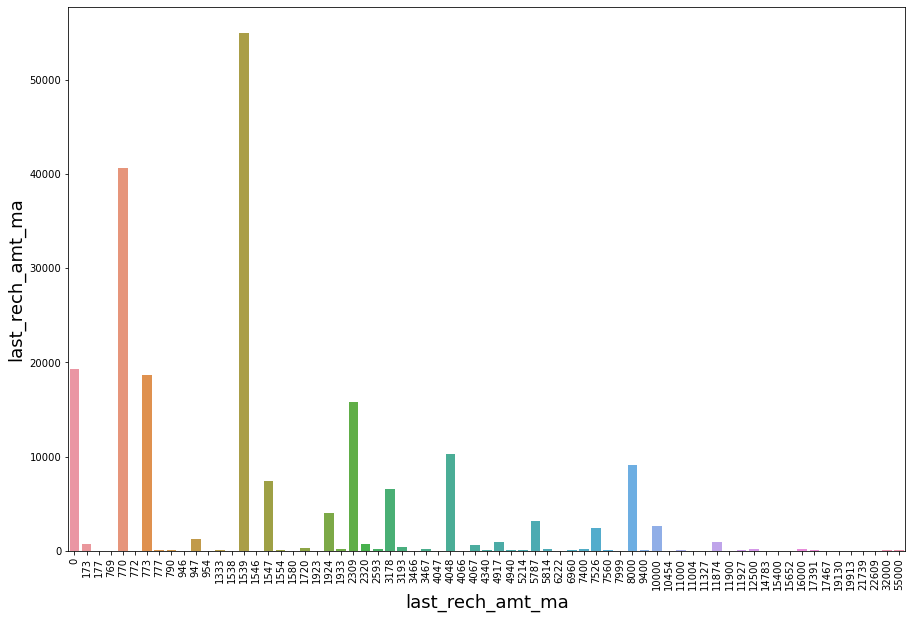

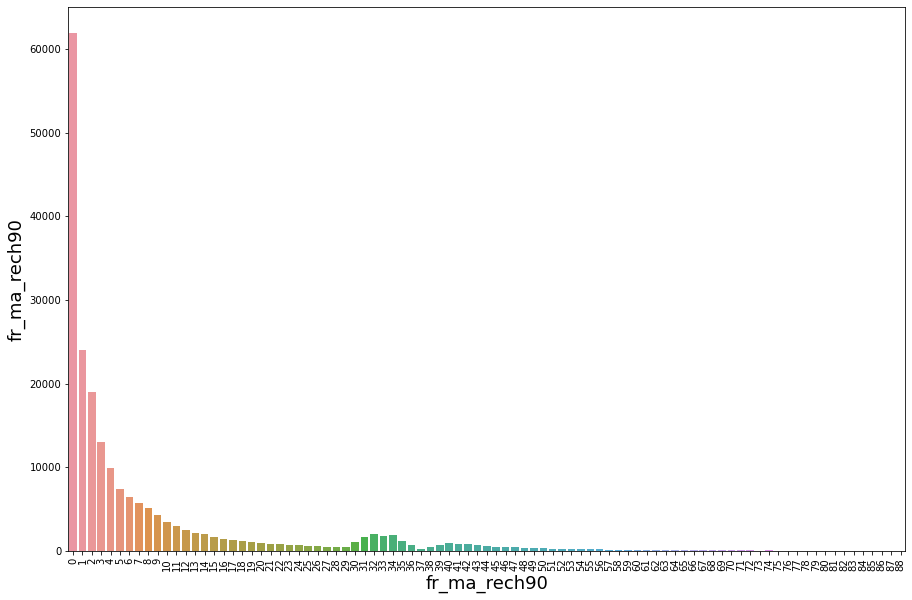

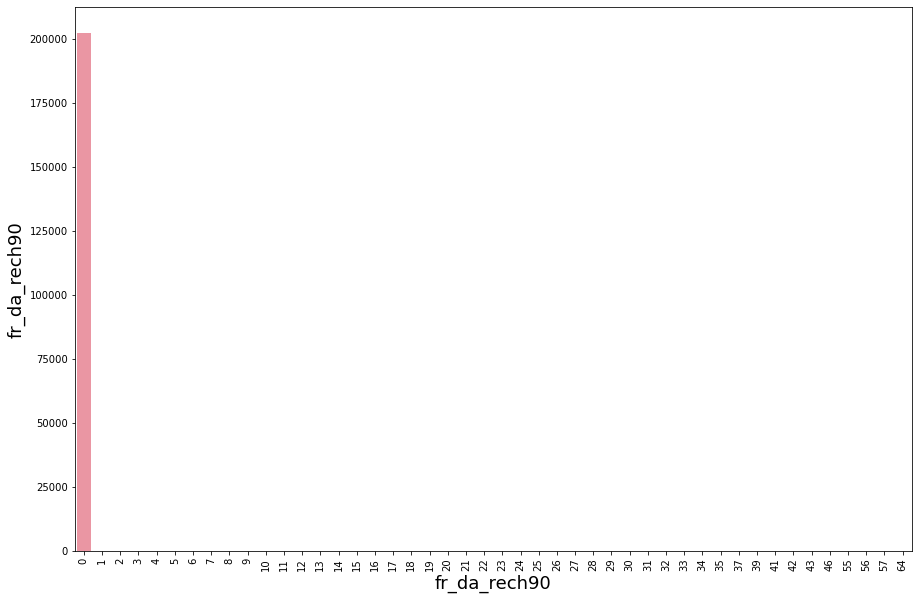

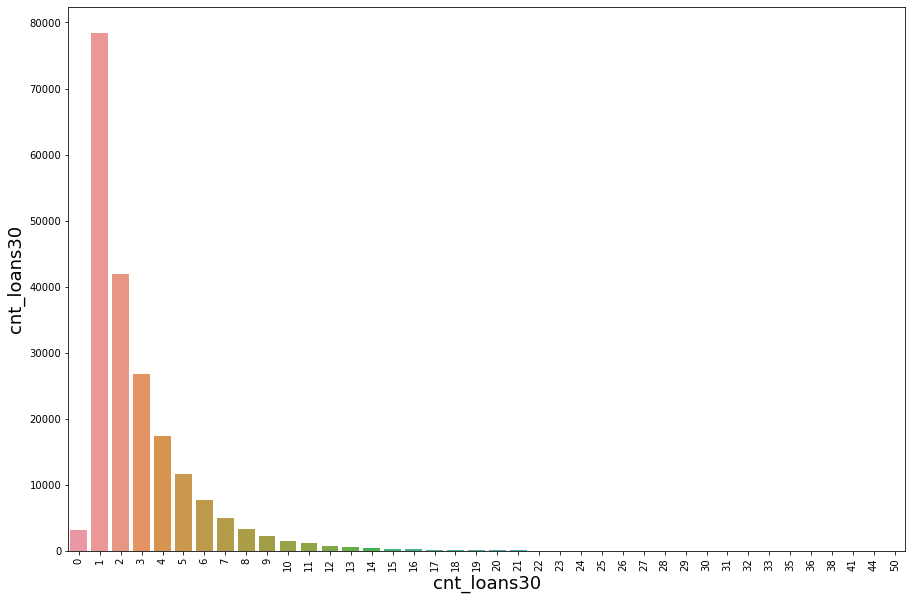

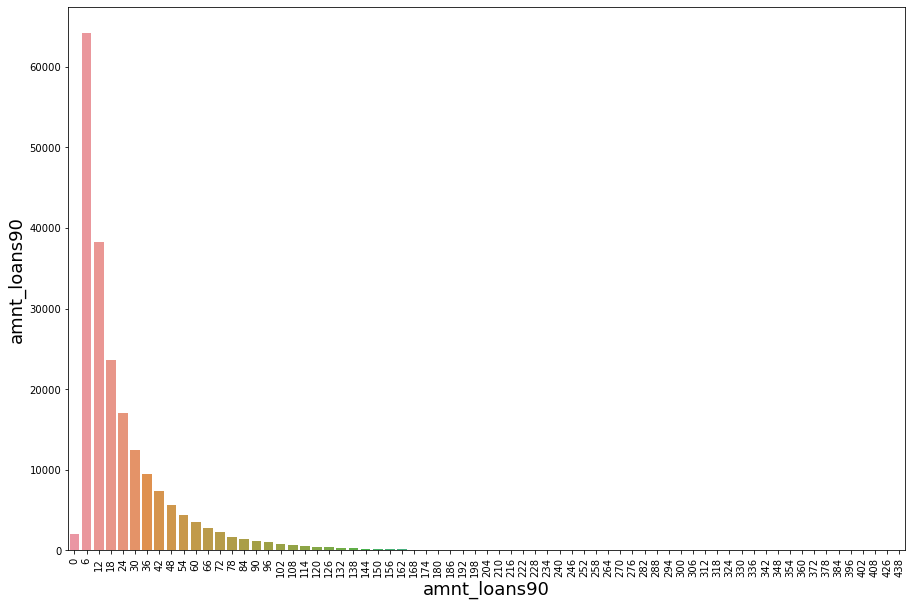

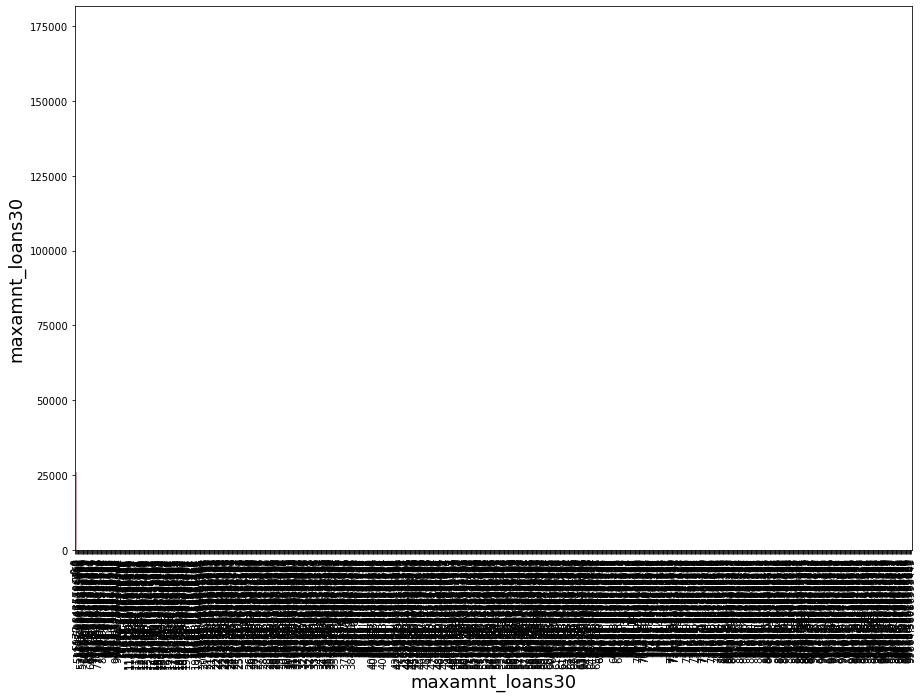

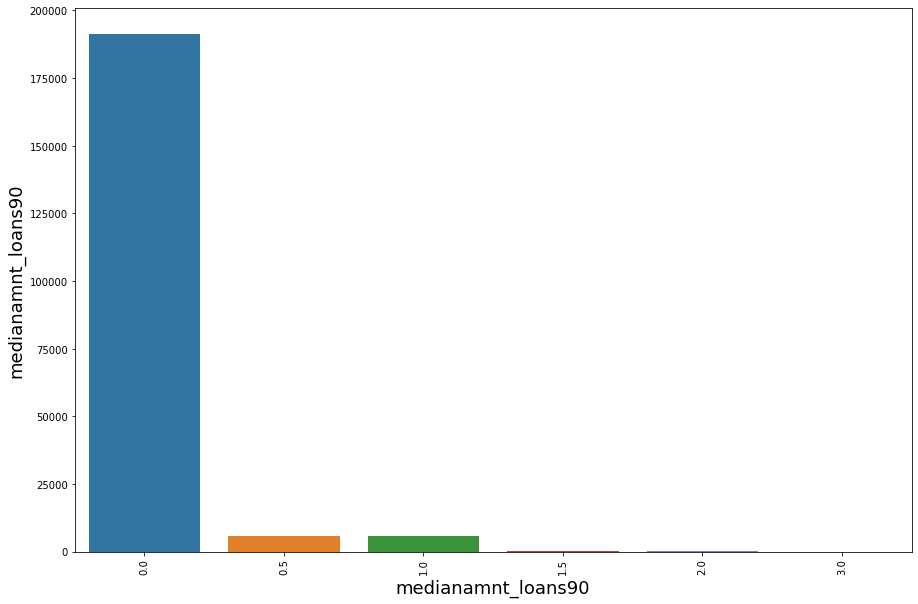

In [30]:
# For loop to display some important features counts in one go after outlier removal...
list=['label', 'last_rech_amt_ma','cnt_ma_rech90', 'fr_ma_rech90','cnt_da_rech90', 'fr_da_rech90',
      'cnt_loans30', 'amnt_loans90','maxamnt_loans30', 'medianamnt_loans90', ]


for i in list:
    plt.subplots(figsize=(15,10))
    sns.countplot(i,data=mcd)
    plt.xticks(rotation=90,fontsize=12)
    plt.xticks(fontsize=10)
    plt.ylabel(i,fontsize=18)
    plt.xlabel(f'{i}',fontsize=18)
    plt.show()

In [31]:
# Checking the Distribution using the histogram plot.
mcd_clean.hist(figsize=(15,15),grid=True,layout=(6,8),bins=30,color='blue') 

array([[<AxesSubplot:title={'center':'label'}>,
        <AxesSubplot:title={'center':'aon'}>,
        <AxesSubplot:title={'center':'daily_decr90'}>,
        <AxesSubplot:title={'center':'last_rech_date_ma'}>,
        <AxesSubplot:title={'center':'last_rech_date_da'}>,
        <AxesSubplot:title={'center':'last_rech_amt_ma'}>,
        <AxesSubplot:title={'center':'medianamnt_ma_rech30'}>,
        <AxesSubplot:title={'center':'medianmarechprebal30'}>],
       [<AxesSubplot:title={'center':'cnt_ma_rech90'}>,
        <AxesSubplot:title={'center':'fr_ma_rech90'}>,
        <AxesSubplot:title={'center':'sumamnt_ma_rech90'}>,
        <AxesSubplot:title={'center':'medianamnt_ma_rech90'}>,
        <AxesSubplot:title={'center':'medianmarechprebal90'}>,
        <AxesSubplot:title={'center':'cnt_da_rech90'}>,
        <AxesSubplot:title={'center':'fr_da_rech90'}>,
        <AxesSubplot:title={'center':'cnt_loans30'}>],
       [<AxesSubplot:title={'center':'maxamnt_loans30'}>,
        <AxesSubplot:tit

From the above plots it is clear that the data is now normally distributed after outlier treatment and skewness removal.

In [32]:
# Checking feature information...
mcd_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197074 entries, 0 to 209592
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 197074 non-null  int64  
 1   aon                   197074 non-null  float64
 2   daily_decr90          197074 non-null  float64
 3   last_rech_date_ma     197074 non-null  float64
 4   last_rech_date_da     197074 non-null  float64
 5   last_rech_amt_ma      197074 non-null  float64
 6   medianamnt_ma_rech30  197074 non-null  float64
 7   medianmarechprebal30  197074 non-null  float64
 8   cnt_ma_rech90         197074 non-null  float64
 9   fr_ma_rech90          197074 non-null  float64
 10  sumamnt_ma_rech90     197074 non-null  float64
 11  medianamnt_ma_rech90  197074 non-null  float64
 12  medianmarechprebal90  197074 non-null  float64
 13  cnt_da_rech90         197074 non-null  float64
 14  fr_da_rech90          197074 non-null  float64
 15  

In [33]:
((209593-197074)/209593)*100

5.973004823634377

After all this cleaning process it is clear that only 5.97% data is removed which was not imaginable for the information these features are providing.

In [34]:
# checking statistical feature information...
mcd_clean.describe()

label            aon   daily_decr90  last_rech_date_ma  \
count  197074.000000  197074.000000  197074.000000      197074.000000   
mean        0.883145       6.165001       6.501437           1.483485   
std         0.321248       0.870110       2.924345           0.931668   
min         0.000000       0.693147       0.000000           0.000000   
25%         1.000000       5.517453       3.891412           0.693147   
50%         1.000000       6.261492       7.406711           1.386294   
75%         1.000000       6.872128       8.993642           2.079442   
max         1.000000       7.800163      12.678046           4.736198   

       last_rech_date_da  last_rech_amt_ma  medianamnt_ma_rech30  \
count      197074.000000     197074.000000         197074.000000   
mean            0.091081          6.708977              6.417064   
std             0.556091          2.288109              2.542768   
min             0.000000          0.000000              0.000000   
25%             0.000000          6.647688              6.647688   
50%             0.000000          7.339538              7.339538   
75%             0.000000          7.745003              7.562681   
max             4.753590         10.915107             10.915107   

       medianmarechprebal30  cnt_ma_rech90   fr_ma_rech90  ...  cnt_da_rech90  \
count         197074.000000  197074.000000  197074.000000  ...  197074.000000   
mean               3.359792       1.629827       1.366985  ...       0.022564   
std                1.929863       0.885039       1.230499  ...       0.150553   
min                0.000000       0.000000       0.000000  ...       0.000000   
25%                2.564949       1.098612       0.000000  ...       0.000000   
50%                3.589059       1.609438       1.098612  ...       0.000000   
75%                4.448516       2.302585       2.197225  ...       0.000000   
max               13.814991       5.820083       4.488636  ...       3.663562   

        fr_da_rech90    cnt_loans30  maxamnt_loans30    cnt_loans90  \
count  197074.000000  197074.000000    197074.000000  197074.000000   
mean        0.009193       1.174300         1.994621       1.321503   
std         0.150559       0.535192         0.326880       0.645018   
min         0.000000       0.000000         0.000000       0.000000   
25%         0.000000       0.693147         1.945910       0.693147   
50%         0.000000       1.098612         1.945910       1.098612   
75%         0.000000       1.609438         1.945910       1.791759   
max         4.174387       3.931826         2.564949       4.276666   

        amnt_loans90  maxamnt_loans90  medianamnt_loans90      payback90  \
count  197074.000000    197074.000000       197074.000000  197074.000000   
mean        2.830003         2.007318            0.033006       1.001298   
std         0.865199         0.289144            0.138901       1.054174   
min         0.000000         0.000000            0.000000       0.000000   
25%         1.945910         1.945910            0.000000       0.000000   
50%         2.564949         1.945910            0.000000       1.029619   
75%         3.433987         1.945910            0.000000       1.717651   
max         6.084499         2.564949            1.386294       5.150397   

            rental90  
count  197074.000000  
mean     3542.600243  
std      5808.679857  
min    -24720.580000  
25%       320.137500  
50%      1379.400000  
75%      4288.900000  
max    200148.110000  

[8 rows x 23 columns]

In [35]:
# printing cleaned data...
mcd_clean

label       aon  daily_decr90  last_rech_date_ma  last_rech_date_da  \
0           0  5.609472      8.028178           1.098612           0.000000   
1           1  6.569481      9.403087           3.044522           0.000000   
2           1  6.284134      7.243513           1.386294           0.000000   
3           1  5.488938      3.101353           3.737670           0.000000   
4           1  6.854355      5.021373           1.609438           0.000000   
...       ...       ...           ...                ...                ...   
209588      1  6.003887      5.029603           0.693147           0.000000   
209589      1  6.981006      3.635901           1.609438           0.000000   
209590      1  6.921658      9.384743           1.386294           0.000000   
209591      1  7.457609      9.439495           1.098612           3.663562   
209592      1  7.366445      8.419761           2.639057           0.000000   

        last_rech_amt_ma  medianamnt_ma_rech30  medianmarechprebal30  \
0               7.339538              7.339538              2.140066   
1               8.663542              8.663542              4.127779   
2               7.339538              7.339538              4.209457   
3               6.854355              0.000000              0.000000   
4               7.745003              7.745003              3.401197   
...                  ...                   ...                   ...   
209588          8.306225              8.064322              4.530554   
209589          6.651572              6.651572              5.089446   
209590          7.339538              7.339538              3.953741   
209591          6.651572              6.651572              5.105945   
209592          8.926252              8.419250              5.879695   

        cnt_ma_rech90  fr_ma_rech90  ...  cnt_da_rech90  fr_da_rech90  \
0            1.098612      3.091042  ...       0.000000           0.0   
1            0.693147      0.000000  ...       0.000000           0.0   
2            0.693147      0.000000  ...       0.000000           0.0   
3            0.693147      0.000000  ...       0.000000           0.0   
4            2.197225      1.098612  ...       0.000000           0.0   
...               ...           ...  ...            ...           ...   
209588       1.386294      1.098612  ...       0.000000           0.0   
209589       1.945910      1.098612  ...       0.000000           0.0   
209590       2.484907      1.791759  ...       0.000000           0.0   
209591       1.945910      1.609438  ...       0.693147           0.0   
209592       1.386294      2.995732  ...       0.000000           0.0   

        cnt_loans30  maxamnt_loans30  cnt_loans90  amnt_loans90  \
0          1.098612         1.945910     1.098612      2.564949   
1          0.693147         2.564949     0.693147      2.564949   
2          0.693147         1.945910     0.693147      1.945910   
3          1.098612         1.945910     1.098612      2.564949   
4          2.079442         1.945910     2.079442      3.761200   
...             ...              ...          ...           ...   
209588     1.098612         1.945910     1.098612      2.564949   
209589     1.386294         1.945910     1.386294      2.944439   
209590     1.609438         2.564949     1.945910      4.007333   
209591     1.098612         2.564949     1.386294      3.218876   
209592     1.098612         2.564949     1.098612      2.944439   

        maxamnt_loans90  medianamnt_loans90  payback90  rental90  
0              1.945910                 0.0   3.401197    260.13  
1              2.564949                 0.0   0.000000   3691.26  
2              1.945910                 0.0   0.000000    900.13  
3              1.945910                 0.0   0.000000    159.42  
4              1.945910                 0.0   1.203973   1098.90  
...                 ...                 ...        ...       ...  
209588         1.945910                 0.0

# Bivariant Analysis

All the categories that is being made to make the visualizations easy are solemnly based on the Description i.e statistical summary of the data plotted above. for instance low comes under(0-25%), average comes under(25-75%) and high comes over 75% of the data values in a given feature

In [36]:
# Making a copy of cleaned data for the visualization purpose...
mcd_visual=mcd_clean.copy()

In [37]:
# Dropping the features which will not be used for visualization purplose...
mcd_visual.reset_index(inplace = True)
mcd_visual.drop(['daily_decr90', 'last_rech_date_ma','last_rech_date_da', 'last_rech_amt_ma', 'medianamnt_ma_rech30',
                'medianmarechprebal30', 'fr_ma_rech90','medianamnt_ma_rech90', 'medianmarechprebal90',
                'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'maxamnt_loans30','maxamnt_loans90', 'medianamnt_loans90',]
               ,axis=1,inplace=True)

In [38]:
# printing the features used for visualization...
mcd_visual


index  label       aon  cnt_ma_rech90  sumamnt_ma_rech90  \
0            0      0  5.609472       1.098612          13.270039   
1            1      1  6.569481       0.693147          13.901372   
2            2      1  6.284134       0.693147          12.576893   
3            3      1  5.488938       0.693147          12.091306   
4            4      1  6.854355       2.197225          15.302587   
...        ...    ...       ...            ...                ...   
197069  209588      1  6.003887       1.386294          14.487948   
197070  209589      1  6.981006       1.945910          13.541508   
197071  209590      1  6.921658       2.484907          15.068489   
197072  209591      1  7.457609       1.945910          15.032846   
197073  209592      1  7.366445       1.386294          14.954618   

        cnt_loans90  amnt_loans90  payback90  rental90  
0          1.098612      2.564949   3.401197    260.13  
1          0.693147      2.564949   0.000000   3691.26  
2          0.693147      1.945910   0.000000    900.13  
3          1.098612      2.564949   0.000000    159.42  
4          2.079442      3.761200   1.203973   1098.90  
...             ...           ...        ...       ...  
197069     1.098612      2.564949   0.693147   1089.19  
197070     1.386294      2.944439   0.693147   1728.36  
197071     1.945910      4.007333   1.575536   8893.20  
197072     1.386294      3.218876   2.442347    984.58  
197073     1.098612      2.944439   0.000000    631.20  

[197074 rows x 9 columns]

**Feature "rental90": Average main account balance over last 90 days vs Loan Repayment Percentage within 5 days**

In [39]:
#Making a new  feature "Balance_Category" to store the different categories for the rental90 feature to get a better view of the visualtion..
conditions_1=[(mcd_visual['rental90'] <=0),mcd_visual['rental90'].between(0,1379),mcd_visual['rental90'].between(1379,4280),(mcd_visual['rental90'] > 4280)]
values_1= ['Negative or zero Balance', 'Low Balance', 'Average Balance','High Balance']
mcd_visual['Balance_Category']=np.select(conditions_1,values_1)

In [40]:
# Printing the new feature...
mcd_visual['Balance_Category'].value_counts()

Low Balance                 87021
High Balance                49379
Average Balance             49179
Negative or zero Balance    11495
Name: Balance_Category, dtype: int64

According to the data it is clear that, users having Low balance are more in number and the persons with negative or zero balance are less.

In [41]:
# Mapping "Balance_Category" feature with precentage value with respect to the label. 
bal_percent = pd.crosstab(mcd_visual['label'],mcd_visual['Balance_Category']).apply(lambda x: x/x.sum()*100)
bal_percent = bal_percent.transpose()

In [42]:
# printing values...
bal_percent

label                             0          1
Balance_Category                              
Average Balance           10.014437  89.985563
High Balance               7.930497  92.069503
Low Balance               12.588915  87.411085
Negative or zero Balance  28.125272  71.874728

Label 0: defaulter

Label 1: Non-defaulter

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Average Balance'),
  Text(1, 0, 'High Balance'),
  Text(2, 0, 'Low Balance'),
  Text(3, 0, 'Negative or zero Balance')])

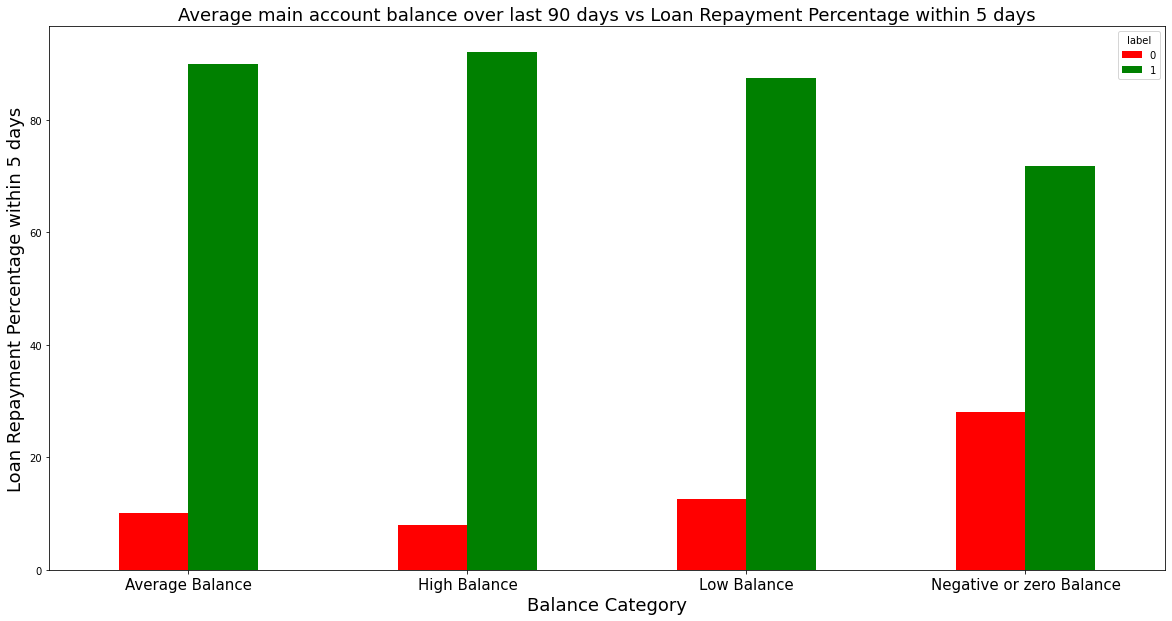

In [43]:
#   Graphical representation of the User's balance along with their (defaulter or non defaulter) category and 
#                    their ability to repay the loan amount within 5 days.

bal_percent.plot(kind='bar',color='rgb',figsize=(20,10))
plt.title('Average main account balance over last 90 days vs Loan Repayment Percentage within 5 days',fontsize=18)
plt.ylabel('Loan Repayment Percentage within 5 days',fontsize=18)
plt.xlabel('Balance Category',fontsize=18)
plt.xticks(rotation = 'horizontal',fontsize=15)

Conclusion:
    From the above Graph and the crosstab table it is clear that:

    1) 28% of Users having negative or zero balance are defaulters, which is very high.
    2) 10% to 12% Users are defaulters which falls in the category of Average and Low balance category.
    3) Users having high balance and are defaulters are very less in number.

**Feature "cnt_loans90": Number of loans taken by user in last 90 days vs Loan Repayment Percentage within 5 days**

In [44]:
# Making a new  feature "Loans_Frequency" to store the different categories for the cnt_loans90 feature to get a better view of the visualtion..
conditions_2=[(mcd_visual['cnt_loans90'] <=0),mcd_visual['cnt_loans90'].between(0,2),(mcd_visual['cnt_loans90'] > 2)]
values_2= ['No Loans Taken', 'Average number of loans Taken','Too much loans taken']
mcd_visual['Loans_Frequency']=np.select(conditions_2,values_2)

In [45]:
mcd_visual['Loans_Frequency'].value_counts()

Average number of loans Taken    163223
Too much loans taken              31902
No Loans Taken                     1949
Name: Loans_Frequency, dtype: int64

Users who take average amount of loans afe more in number.

In [46]:
# Mapping Loans_Frequency with precentage value with respect to label 
Loans_percent = pd.crosstab(mcd_visual['label'],mcd_visual['Loans_Frequency']).apply(lambda x: x/x.sum()*100)
Loans_percent = Loans_percent.transpose()
Loans_percent

label                                  0           1
Loans_Frequency                                     
Average number of loans Taken  13.882235   86.117765
No Loans Taken                  0.000000  100.000000
Too much loans taken            1.159802   98.840198

(array([0, 1, 2]),
 [Text(0, 0, 'Average number of loans Taken'),
  Text(1, 0, 'No Loans Taken'),
  Text(2, 0, 'Too much loans taken')])

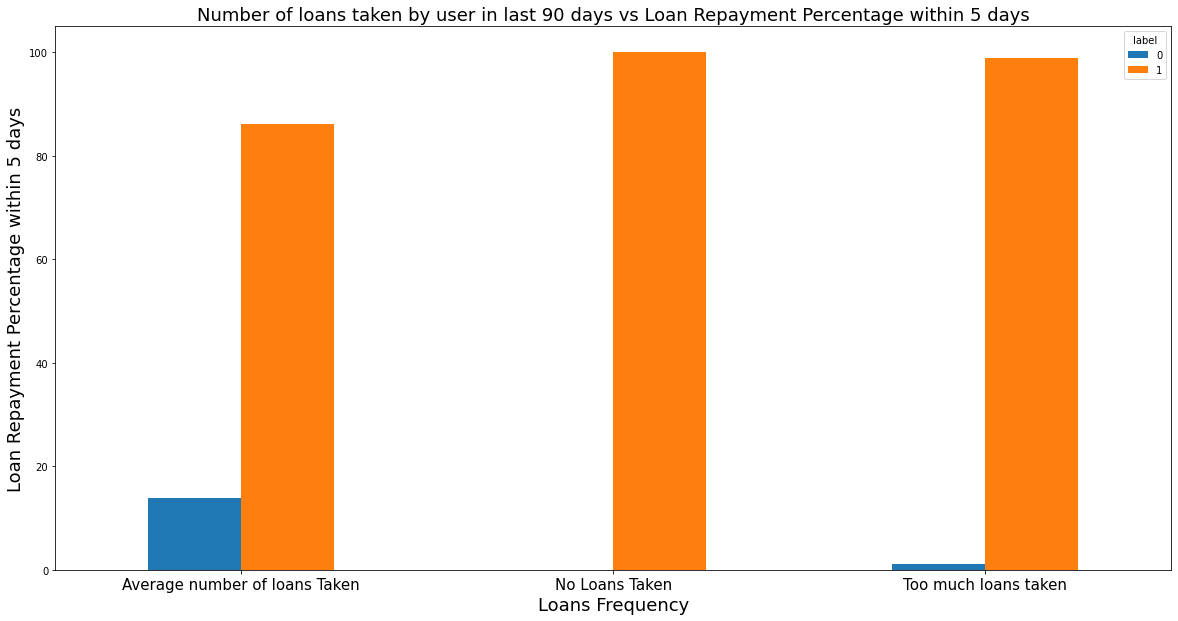

In [47]:
#   Graphical representation of the Loans_Frequency along with their (defaulter or non defaulter) category and 
#                    their ability to repay the loan amount within 5 days.

Loans_percent.plot(kind='bar',figsize=(20,10))
plt.title('Number of loans taken by user in last 90 days vs Loan Repayment Percentage within 5 days',fontsize=18)
plt.ylabel('Loan Repayment Percentage within 5 days',fontsize=18)
plt.xlabel('Loans Frequency',fontsize=18)
plt.xticks(rotation = 'horizontal',fontsize=15)

    Conclusion:
    From the above graph it is clear that:

    1) Users who take more number of loans are non defaulters(i.e 98% of the category) as they repays the loan within the given time i.e 5 days.
    2) 14% of the Users are are among the average number of loan taken category are defaulters.

**Feature "sumamnt_ma_rech90":Total amount of recharge in main account over last 90 days (in Indian Rupee) vs Loan Repayment Percentage within 5 days**

In [48]:
# Making a new  feature "Recharge_Amount_Category" to store the different categories for the sumamnt_ma_rech90 feature to get a better view of the visualtion..
conditions_3=[(mcd_visual['sumamnt_ma_rech90'] <=0),mcd_visual['sumamnt_ma_rech90'].between(0,12),mcd_visual['sumamnt_ma_rech90'].between(12,15),(mcd_visual['sumamnt_ma_rech90'] > 14)]
values_3= ['No Recharge', 'Between 0 and 12(Rupiah)', 'Between 12 and 15(Rupiah)','More than 15']
mcd_visual['Recharge_Amount_Category']=np.select(conditions_3,values_3)

In [49]:
mcd_visual['Recharge_Amount_Category'].value_counts()

Between 12 and 15(Rupiah)    125251
More than 15                  45374
No Recharge                   18683
Between 0 and 12(Rupiah)       7766
Name: Recharge_Amount_Category, dtype: int64

In [50]:
# Mapping Recharge_Amount_Category with precentage value with respect to label 
Recharge_percent = pd.crosstab(mcd_visual['label'],mcd_visual['Recharge_Amount_Category']).apply(lambda x: x/x.sum()*100)
Recharge_percent = Recharge_percent.transpose()
Recharge_percent

label                              0          1
Recharge_Amount_Category                       
Between 0 and 12(Rupiah)   34.226114  65.773886
Between 12 and 15(Rupiah)   9.677368  90.322632
More than 15                1.586812  98.413188
No Recharge                40.304020  59.695980

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Between 0 and 12(Rupiah)'),
  Text(1, 0, 'Between 12 and 15(Rupiah)'),
  Text(2, 0, 'More than 15'),
  Text(3, 0, 'No Recharge')])

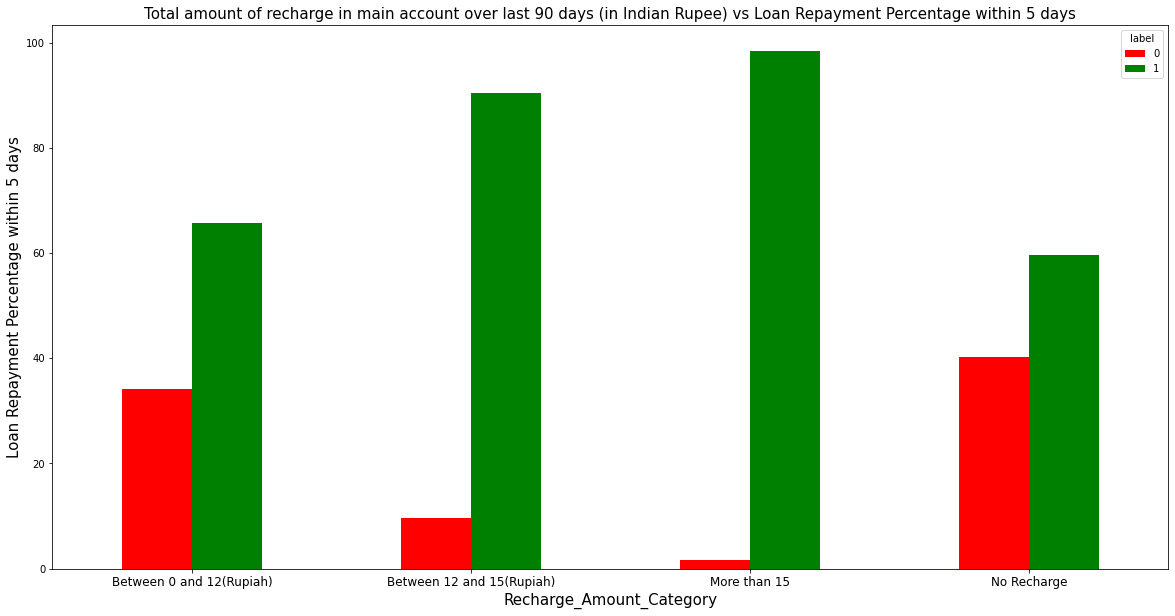

In [51]:
#   Graphical representation of the Recharge_Amount_Category along with their (defaulter or non defaulter) category and 
#                    their ability to repay the loan amount within 5 days.


Recharge_percent.plot(kind='bar',color='rgb',figsize=(20,10))
plt.title('Total amount of recharge in main account over last 90 days (in Indian Rupee) vs Loan Repayment Percentage within 5 days',fontsize=15)
plt.ylabel('Loan Repayment Percentage within 5 days',fontsize=15)
plt.xlabel('Recharge_Amount_Category',fontsize=15)
plt.xticks(rotation = 'horizontal',fontsize=12)

    Conclusion:
    From the above graph it is clear that:
    
    1) 40 % of the Users who do not even recharged in the 90 days are defaulters only.
    2) Users who do very high amount of recharge always pays their loans on time. i.e 98% of them are non defaulters.
    3) 34% of the Users who do less amount of recharge are defaulters.

**Feature "payback90":Average payback time in days over last 90 days vs Loan Repayment Percentage within 5 days**

In [52]:
# Making a new  feature "Defaulters_Category" to store the different categories for the payback90 feature to get a better view of the visualtion..
conditions_4=[(mcd_visual['payback90'] <=5),(mcd_visual['payback90'] > 5)]
values_4= ['Not Defaulters','Defaulters']
mcd_visual['Defaulters_Category']=np.select(conditions_4,values_4)

In [53]:
mcd_visual['Defaulters_Category'].value_counts()

Not Defaulters    196995
Defaulters            79
Name: Defaulters_Category, dtype: int64

In [54]:
# Mapping Defaulters_Category with precentage value with respect to label 
Defaulters_percent = pd.crosstab(mcd_visual['label'],mcd_visual['Defaulters_Category']).apply(lambda x: x/x.sum()*100)
Defaulters_percent = Defaulters_percent.transpose()
Defaulters_percent

label                        0          1
Defaulters_Category                      
Defaulters           11.392405  88.607595
Not Defaulters       11.685576  88.314424

In [55]:
#   Graphical representation of the Defaulters_Category along with their (defaulter or non defaulter) category and 
#                    their ability to repay the loan amount within 5 days.


Defaulters_percent.plot(kind='bar',figsize=(20,10))
plt.title('Average payback time in days over last 90 days vs Loan Repayment Percentage within 5 days',fontsize=20)
plt.ylabel('Loan Repayment Percentage within 5 days',fontsize=18)
plt.xlabel('Defaulters_Category',fontsize=16)
plt.xticks(rotation = 'horizontal',fontsize=15)


(array([0, 1]), [Text(0, 0, 'Defaulters'), Text(1, 0, 'Not Defaulters')])

**Feature "amnt_loans90": Total amount of loans taken by user in last 90 days vs Loan Repayment Percentage within 5 days**

In [56]:
# Making a new  feature "Loan_Amount_Category" to store the different categories for the amnt_loans90 feature to get a better view of the visualtion..
conditions_5=[(mcd_visual['amnt_loans90'] <=0),mcd_visual['amnt_loans90'].between(0,1),mcd_visual['amnt_loans90'].between(1,3),(mcd_visual['amnt_loans90'] > 3)]
values_5= ['No loans', 'Low Amount', 'Average Amount','High Amount']
mcd_visual['Loan_Amount_Category']=np.select(conditions_5,values_5)

In [57]:
# Printing the values...
mcd_visual['Loan_Amount_Category'].value_counts()

Average Amount    122273
High Amount        72852
No loans            1949
Name: Loan_Amount_Category, dtype: int64

Users who take small loans are more in number

In [58]:
# Mapping Loan_Amount_Category with precentage value with respect to label 
Loan_percent = pd.crosstab(mcd_visual['label'],mcd_visual['Loan_Amount_Category']).apply(lambda x: x/x.sum()*100)
Loan_percent = Loan_percent.transpose()
Loan_percent

label                         0           1
Loan_Amount_Category                       
Average Amount        17.415128   82.584872
High Amount            2.381541   97.618459
No loans               0.000000  100.000000

In [59]:
#   Graphical representation of the Loan_Amount_Category along with their (defaulter or non defaulter) category and 
#                    their ability to repay the loan amount within 5 days.

Loan_percent.plot(kind='bar',color='rgb',figsize=(20,10))
plt.title('Total amount of loans taken by user in last 90 days vs Loan Repayment Percentage within 5 days',fontsize=18)
plt.ylabel('Loan Repayment Percentage within 5 days',fontsize=16)
plt.xlabel('Loan Amount Category',fontsize=14)
plt.xticks(rotation = 'horizontal',fontsize=10)

(array([0, 1, 2]),
 [Text(0, 0, 'Average Amount'),
  Text(1, 0, 'High Amount'),
  Text(2, 0, 'No loans')])

    Conclusion:
    From the above graph it is clear that:

    1) Users who did not take any loans are non defaulters.
    2) Most of the Users(i.e 97%) who take large amount of loans comes under non defaulter category.
    3) 17% of the users who take small loans are defaulters.

**Feature "cnt_ma_rech90" :Number of times main account got recharged in last 90 days vs Loan Repayment Percentage within 5 days**

In [60]:
# Making a new  feature "Recharge Frequency" to store the different categories for the cnt_ma_rech90 feature to get a better view of the visualtion..
conditions_6=[(mcd_visual['cnt_ma_rech90'] <=0),mcd_visual['cnt_ma_rech90'].between(0,1),mcd_visual['cnt_ma_rech90'].between(1,3),(mcd_visual['cnt_ma_rech90'] > 3)]
values_6= ['Not Recharged', 'Low Recharge Frequency', 'Average Recharge Frequency','High Recharge Frequency']
mcd_visual['Recharge Frequency']=np.select(conditions_6,values_6)

In [61]:
# Printing values...
mcd_visual['Recharge Frequency'].value_counts()

Average Recharge Frequency    142698
Low Recharge Frequency         25315
Not Recharged                  18683
High Recharge Frequency        10378
Name: Recharge Frequency, dtype: int64

In [62]:
# Mapping Recharge Frequency with precentage value with respect to label 
Recharge_percent = pd.crosstab(mcd_visual['label'],mcd_visual['Recharge Frequency']).apply(lambda x: x/x.sum()*100)
Recharge_percent = Recharge_percent.transpose()
Recharge_percent

label                               0          1
Recharge Frequency                              
Average Recharge Frequency   6.213121  93.786879
High Recharge Frequency      0.645596  99.354404
Low Recharge Frequency      25.937191  74.062809
Not Recharged               40.304020  59.695980

In [63]:
#   Graphical representation of the Recharge Frequency along with their (defaulter or non defaulter) category and 
#                    their ability to repay the loan amount within 5 days.

Recharge_percent.plot(kind='bar',figsize=(18,9))
plt.title('Number of times main account got recharged in last 90 days vs Loan Repayment Percentage within 5 days',fontsize=16)
plt.ylabel('Loan Repayment Percentage within 5 days',fontsize=14)
plt.xlabel('Recharge Frequency',fontsize=12)
plt.xticks(rotation = 'horizontal',fontsize=10)


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Average Recharge Frequency'),
  Text(1, 0, 'High Recharge Frequency'),
  Text(2, 0, 'Low Recharge Frequency'),
  Text(3, 0, 'Not Recharged')])

    Conclusion:
    From the above graph it is clear that:

    1) Among the Users who have not done a single recharge in 3 months 40% are defaulters.
    2) Among the Users who are very frequent in recharging and who always pay their loans on time are more in number i.e 99% of the total category, which is a good news for the company.

**Feature "aon": age on cellular network in days vs Loan Repayment Percentage within 5 days**

In [64]:
# Making a new  feature "Users_Category" to store the different categories for the "aon" feature to get a better view of the visualtion..
conditions_7=[(mcd_visual['aon'] <2),mcd_visual['aon'].between(2,5),(mcd_visual['aon'] > 5)]
values_7= ['New Users','Average Users','Old Users']
mcd_visual['Users_Category']=np.select(conditions_7,values_7)

In [65]:
# Printing the values...
mcd_visual['Users_Category'].value_counts()

Old Users        173827
Average Users     23143
New Users           104
Name: Users_Category, dtype: int64

New Users are very few in number as compared to Old Users which are in a large number

In [66]:
# Mapping Users_Category with precentage value with respect to label.. 
Users_percent = pd.crosstab(mcd_visual['label'],mcd_visual['Users_Category']).apply(lambda x: x/x.sum()*100)
Users_percent = Users_percent.transpose()
Users_percent

label                   0          1
Users_Category                      
Average Users   19.418399  80.581601
New Users       32.692308  67.307692
Old Users       10.643341  89.356659

In [67]:
#         Graphical representation of the User's Age on the cellular network along with 
#    their (defaulter or non defaulter) category and their ability to repay the loan amount within 5 days...

Users_percent.plot(kind='bar',color='rgb',figsize=(10,8))
plt.title('age on cellular network in days vs Loan Repayment Percentage within 5 days',fontsize=18)
plt.ylabel('Loan Repayment Percentage within 5 days',fontsize=16)
plt.xlabel('Users Category',fontsize=14)
plt.xticks(rotation = 'horizontal',fontsize=12)

(array([0, 1, 2]),
 [Text(0, 0, 'Average Users'),
  Text(1, 0, 'New Users'),
  Text(2, 0, 'Old Users')])

    Conclusion:
    From the above graph it is clear that:

    1) 32% of the uers who are defaulters are the new users.
    2) Old Users are trusted and they are mostly non defaulters.

In [68]:
# Dropping the target value to fit the remaining data into standard scaler 
x2=mcd_clean.drop(['label'],axis=1)
x2
print(x2.shape)

(197074, 22)


In [69]:
# Setting up the Target value in variable y1.
y1=mcd_clean['label']
y1.shape

(197074,)

In [70]:
# Importing Library for Handling Imbalance dataset
from imblearn.combine import SMOTETomek

In [71]:
# Treating Imbalance data..
smk = SMOTETomek(random_state=50)
x1,y=smk.fit_sample(x2,y1)
x1.shape, y.shape

((344204, 22), (344204,))

In [72]:
# scaling the input variable for further evaluation
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x1)
x=pd.DataFrame(x,columns=x1.columns)
x
# Thus we can infer that dataset becomes scaled.

aon  daily_decr90  last_rech_date_ma  last_rech_date_da  \
0      -0.530649      0.770904          -0.363109          -0.153873   
1       0.594904      1.202616           1.474994          -0.153873   
2       0.260352      0.524525          -0.091365          -0.153873   
3      -0.671968     -0.776084           2.129740          -0.153873   
4       0.928901     -0.173211           0.119416          -0.153873   
...          ...           ...                ...                ...   
344199 -0.644644     -0.819490          -0.339039          -0.153873   
344200  0.360370      0.746191          -0.428727          -0.153873   
344201  0.716056     -1.749887          -1.400856          -0.153873   
344202 -1.721642     -1.749887          -1.400856          -0.153873   
344203 -1.582137      0.402839          -1.400856          -0.153873   

        last_rech_amt_ma  medianamnt_ma_rech30  medianmarechprebal30  \
0               0.473353              0.565858             -0.331277   
1               0.923721              0.988342              0.641943   
2               0.473353              0.565858              0.681934   
3               0.308316             -1.776159             -1.379092   
4               0.611274              0.695240              0.286196   
...                  ...                   ...                   ...   
344199          0.504085              0.578825              0.340346   
344200          0.433034              0.528034              0.617467   
344201         -2.023231             -1.776159             -1.379092   
344202         -2.023231             -1.776159             -1.379092   
344203         -2.023231             -1.776159             -1.379092   

        cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  ...  cnt_da_rech90  \
0           -0.195151      1.615606           0.371894  ...      -0.143921   
1           -0.646312     -0.912108           0.486549  ...      -0.143921   
2           -0.646312     -0.912108           0.246014  ...      -0.143921   
3           -0.646312     -0.912108           0.157828  ...      -0.143921   
4            1.027273     -0.013713           0.741019  ...      -0.143921   
...               ...           ...                ...  ...            ...   
344199       0.124952     -0.732122           0.426316  ...      -0.143921   
344200       0.443974      1.211086           0.458856  ...      -0.143921   
344201      -1.417576     -0.912108          -2.038038  ...      -0.143921   
344202      -1.417576     -0.912108          -2.038038  ...      -0.143921   
344203      -1.417576     -0.912108          -2.038038  ...      -0.143921   

        fr_da_rech90  cnt_loans30  maxamnt_loans30  cnt_loans90  amnt_loans90  \
0          -0.069622     0.138658        -0.151381    -0.059242     -0.009978   
1          -0.069622    -0.725831         2.263374    -0.770089     -0.009978   
2          -0.069622    -0.725831        -0.151381    -0.770089     -0.810313   
3          -0.069622     0.138658        -0.151381    -0.059242     -0.009978   
4          -0.069622     2.229879        -0.151381     1.660311      1.536614   
...              ...          ...              ...          ...           ...   
344199     -0.069622     0.697696        -0.151381     0.400438      0.437194   
344200     -0.069622     0.646938        -0.151381     0.358701      0.396593   
344201     -0.069622    -0.725831        -0.151381    -0.770089     -0.810313   
344202     -0.069622    -0.725831        -0.151381    -0.770089     -0.810313   
344203     -0.069622    -0.725831        -0.151381    -0.770089     -0.810313   

        maxamnt_loans90  medianamnt_loans90  payback90  rental90  
0             -0.200769           -0.226257   2.560012 -0.534586  
1              2.497715           -0.226257  -0.738803  0.128807  
2             -0.200769           -0.226257  -0.738803 -0.410845  
3             -0.200769           -0.226257  -0.738803 -0.554058  
4             -0.200769           -0.2

# Importing libraries for Model 

In [73]:
# .....................Importing Important libraries for Classification Models................
# Models from Scikit-Learn...
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Ensemble Techniques...


from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

# Model selection libraries...
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.model_selection import GridSearchCV

# Importing some metrics we can use to evaluate our model performance.... 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score

#imbalance data treating libraries
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

**Best Ramdom State**

In [74]:
Maxacc=0
MaxRS=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    Logic=LogisticRegression()
    Logic.fit(x_train,y_train)
    pred=Logic.predict(x_test)
    accur=accuracy_score(y_test,pred)
    if accur>Maxacc:
        Maxacc=accur
        MaxRS=i

print("Best Accuracy is ",Maxacc,"and random_state",MaxRS)

Best Accuracy is  0.7674555983808177 and random_state 7


In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=7)

# Creating Model

In [76]:
models=[LogisticRegression(),
       KNeighborsClassifier(),DecisionTreeClassifier(),
       AdaBoostClassifier()]

In [77]:
for model in range(len(models)):
    mode=models[model]
    mode.fit(x_train,y_train)
    pred=mode.predict(x_test)
    print(models[model],"accuracy score",accuracy_score(y_test,pred))
    print("Confusion Matrix\n",confusion_matrix(y_test,pred))
    print("Classification Report\n",classification_report(y_test,pred))

LogisticRegression() accuracy score 0.7674555983808177
Confusion Matrix
 [[40083 11510]
 [12503 39166]]
Classification Report
               precision    recall  f1-score   support

           0       0.76      0.78      0.77     51593
           1       0.77      0.76      0.77     51669

    accuracy                           0.77    103262
   macro avg       0.77      0.77      0.77    103262
weighted avg       0.77      0.77      0.77    103262

KNeighborsClassifier() accuracy score 0.873738645387461
Confusion Matrix
 [[47229  4364]
 [ 8674 42995]]
Classification Report
               precision    recall  f1-score   support

           0       0.84      0.92      0.88     51593
           1       0.91      0.83      0.87     51669

    accuracy                           0.87    103262
   macro avg       0.88      0.87      0.87    103262
weighted avg       0.88      0.87      0.87    103262

DecisionTreeClassifier() accuracy score 0.904650306986113
Confusion Matrix
 [[47017  4576]


By above we can conclude that decision tree has good accuracy as it has 90%

**Checking Cross validation score**

In [78]:
from sklearn.model_selection import cross_val_score

In [79]:
for model in range(len(models)):
    cross=cross_val_score(models[model],x,y,cv=3)
    print("Cross val score for : ",models[model],cross.mean())

Cross val score for :  LogisticRegression() 0.7640962928779006
Cross val score for :  KNeighborsClassifier() 0.8712391603790902
Cross val score for :  DecisionTreeClassifier() 0.8997978462303625
Cross val score for :  AdaBoostClassifier() 0.86440022985233


After all this process conclusion is that Decision Tree Classifier is performing well in terms of Accuracy score and Cross val score as compared to other models.

Thus Using Gridsearch CV for Hyperparameter tuning

# Hyper Parameter Tuning

In [80]:
# Function for GridSearch
from sklearn.model_selection import GridSearchCV

In [81]:
#decision tree parameters
Dtree_parameters={'max_depth':np.arange(2,15),
               'criterion':['gini','entropy'],
               'splitter':['best','random']}

DT=GridSearchCV(DecisionTreeClassifier(),Dtree_parameters,cv=3)

DT.fit(x_train,y_train)

DT.best_params_

{'criterion': 'entropy', 'max_depth': 14, 'splitter': 'best'}

In [82]:
Dtree_model=DecisionTreeClassifier(criterion= 'entropy', max_depth= 14,splitter='best')
Dtree_model.fit(x_train,y_train)

pred=Dtree_model.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))



90.24229629486162
[[45670  5923]
 [ 4153 47516]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.90     51593
           1       0.89      0.92      0.90     51669

    accuracy                           0.90    103262
   macro avg       0.90      0.90      0.90    103262
weighted avg       0.90      0.90      0.90    103262



In [83]:
#Auc/Roc Curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(Dtree_model,x_test,y_test)
plt.title("Reciver Operating Charecteristic")
plt.xlabel('False Postive rate')
plt.ylabel('True Postive rate')
plt.show()

After all this process conclusion of Hyper Parameter, Decision Tree Classifier is giving accuracy of 96%. So now I am making a final model using Decision Treee Classifier.

In [84]:
# Using DecisiontreeClassifier for final model...
finaldt=DecisionTreeClassifier()
finaldt.fit(x_train,y_train)
print(finaldt)
prd=finaldt.predict(x_test)
ac=accuracy_score(y_test,prd)
rcal=recall_score(y_test,prd,average='binary')
prec=precision_score(y_test,prd,average='binary')
f1=f1_score(y_test,prd)

result=pd.DataFrame([['DecisionTreeClassifier',ac,rcal,prec,f1]],
                   columns=['Model','Accuracy','Recall','Precision','F1 score'])

result

DecisionTreeClassifier()


Model  Accuracy    Recall  Precision  F1 score
0  DecisionTreeClassifier  0.904515  0.897443   0.910447  0.903899

**Saving Model**

In [85]:
# Dumping Data in pickle file.
import joblib

joblib.dump(finaldt,'Micro_credit.pkl')

['Micro_credit.pkl']

**Conclusion**

In [86]:
mcd=np.array(y_test)
mcd

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [87]:
predct=np.array(finaldt.predict(x_test))

In [89]:
mcd_pred=pd.DataFrame({"Original":mcd,"predicted":predct},index=range(len(mcd)))

In [90]:
mcd_pred

Original  predicted
0              1          1
1              1          1
2              1          1
3              1          1
4              0          0
...          ...        ...
103257         1          1
103258         0          0
103259         1          1
103260         0          0
103261         0          0

[103262 rows x 2 columns]

Conclusion:

    1) 28% of Users having negative or zero balance are defaulters, which is very high.
    2) 10% to 12% Users are defaulters which falls in the category of Average and Low balance category.
    3) Users having high balance and are defaulters are very less in number.
    4) Users who take more number of loans are non defaulters(i.e 98% of the category) as they repays the loan within the given time i.e 5 days.
    5) 14% of the Users are are among the average number of loan taken category are defaulters.
    6) 40 % of the Users who do not even recharged in the 90 days are defaulters only.
    7) Users who do very high amount of recharge always pays their loans on time. i.e 98% of them are non-defaulters.
    8) 34% of the Users who do less amount of recharge are defaulters.
    9) Users who did not take any loans are non defaulters.
    10) Most of the Users(i.e 97%) who take large amount of loans comes under non defaulter category.
    11) 17% of the users who take small loans are defaulters.
    12) Among the Users who have not done a single recharge in 3 months 40% are defaulters.
    13) Among the Users who are very frequent in recharging and who always pay their loans on time are more in number i.e 99% of the total category, which is a good news for the company.
    14) 32% of the uers who are defaulters are the new users.
    15) Old Users are trusted and they are mostly non defaulters.

Steps Followed:

    1) Data Analysis.
    2) EDA Analysis.
    3) Different models are used and machine is trained for each models to find Best Accuracy Score.
    4) Best parameters are found using Gridsearch cv and applied to the best models.
    5) AUC ROC Curve is prepared for best model.
    9) Pickle file is named with Micro_credit.pkl